In [ ]:
! pip install keras
! pip install fastparquet
! pip install folium
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_blobs
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
import re
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import json
import requests
import branca 

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

# 1 Predicting the Number of Solar Panels in the United States

Fall 2021

Athan Chan: Modeling, writeups, debugging, project consulting

Brendan Co: Data Cleaning, merging datasets, writeups, final project aesthetics

Ayden Salazar: Modeling, hyperparameter tuning, writeups, visualizations

As a group, we strongly believe all the work for this project was equally divided and completed. Therefore, we all feel like we should be graded equally for each part of the project. 

## 1.1 Abstract (5 points)

The main inspiration for the project is our desire to combat climate change as it poses a number of negative consequences for the planet such as extreme disasters (droughts, floods, and extreme temperatures), melting glaciers, and changing crop yields. With the recent Clean Electricity Performance Program under Biden, there has been 150 billion dollars of federal funds invested to combat climate change and accelerate development of sustainable energy. Our project’s focuses on predicting the number of solar panels in the United States at two different scopes. By being able to predict the number of solar panels, we can allocate resources, policies, and funding to certain areas with less solar panels. This allocation will inevitably increase equal access to solar panel electricity and possibly support policy decisions.

Our first prediction problem is predicting the number of solar panels systems for each county in the United States using 3 datasets (DeepSolar, Tracking The Sun, US Zipcode to County State to FIPS). Our second prediction is predicting the number of solar panel systems for each county in California using 4 datasets (3 datasets from the first prediction problem and SacBee). For both prediction problems, we use three prediction models: LASSO, RIDGE, and a neural network. In all models, neural networks performed the best on the data sets. Despite tuning the parameters for LASSO (R-squared: 0.749) and RIDGE (R-squared: 0.706), neural networks perform better with (R-squared: 0.798) with test errors. For the training data, LASSO and RIDGE did not overfit as much as the neural networks. 

Through this project, we were able to learn how to produce results with real world data and it also taught us how difficult it could be to obtain the data we need for our prediction questions. Originally, we planned on using FIPS codes, but since the granularities did not match between other datasets, we had to change granularity to state-county FIPS codes (or the first five numbers of a FIPS code). Despite many twists and turns, we were able to find some meaningful results and determine which areas should be targeted (based on the visualization we produced at the end).

## 1.2 Project Background (5 points)

Climate Change has been a recent ongoing issue. The result of this problem has been greenhouse emissions such as water vapor, nitrous oxide, carbon dioxide and methane (NASA). These molecules are released by the increased use of fossil fuels to power a lot of the technology we use today. As technology advances, the demand for energy will increase and the planet can not sustain anymore carbon emissions. By 2050, we need to stop emitting carbon emissions or there will be irreversible damage done to the environment. 
 
The main consequences of climate change are, the earth will be warmer on average, there will be individual places that will become warmer or wetter than others, a strong greenhouse effect that will melt glaciers and increase sea levels, greenhouse gases that may affect crop yields and other factors that we currently do not know. Additionally, there are other climate extremes caused by climate change such as droughts, floods, and extreme temperatures. It is also tested that climate change may lead to decrease in nutritional value for most food crops by reducing concentration of protein and minerals in most plant species. There is a 95 percent probability that human activity has warmed our planet, which means that the main cause of global warming is our daily emissions of greenhouse gases as humans living in a modern civilization. 
 
To reduce fossil fuel consumption and combat climate change, there have been widespread efforts to adopt renewable energy such as wind energy and solar energy. In order to combat climate change, Biden released a Clean Electricity Performance Program, which invests 150 billion dollars into reducing emissions, creating new jobs, and growing the economy. His goal is to achieve 100% clean energy by 2035. He plans on using federal money to accelerate the development of sustainable energy (McIntyre and Murrow).
 
To achieve this difficult goal, Biden plans to invest in power companies that meet annual targets for clean energy. The program also plans on penalizing power companies that fail to meet their energy targets that are set by the government. 
For our project, we wanted to focus on solar energy in particular and wanted to find better ways to predict the amount of solar panels in a region. By having this information, solar panel marketers can target places that should get solar panels as additional energy generated can be sold back to the powerplant. We decided to use as many features as we could find to create a model that will determine how many solar panels are in a county. By targeting places that have less solar panels, we can help have more renewable energy systems to help achieve the global 2050 zero carbon emissions.

“The Causes of Climate Change.” NASA, NASA, 30 Nov. 2021, climate.nasa.gov/causes 

September 14, 2021 Yvonne McIntyre Derek Murrow. “House Proposes Strong Clean Electricity Performance Program.” NRDC, 14 Sept. 2021, https://www.nrdc.org/experts/yvonne-mcintyre/house-proposes-strong-clean-electricity-performance-program. 

## 1.3 Project Objective (5 points)

The purpose of our project is to predict how many solar systems are in each county in the United States and in California with different datasets. We felt that being able to predict solar systems can help us understand where places have the most solar panels and places that might need to invest in solar panels. Having these answers will ultimately help us become a more greener society as we can rely less on fossil fuels. 

The purpose of this is to predict how many solar systems are in each county in California. After finding the SacBee dataset, we felt we could make a more accurate prediction model by including data about the political stance of each county. It is important to note that information on political leaning is not found in either the DeepSolar or Tracking The Sun dataset. 

The resource allocation is adjusting which places may need more incentives to invest in solar panels. For example, if there is a county that has no incentives, not a lot of solar panels, but a lot of sunlight in the region, we would want to increase the incentives for solar panel installation in that region through grants, rebates, and more. 

## 1.4 Input Data Description (5 points)

### 1.4.1 Question 1:

#### Deepsolar
We obtained this data from Stanford’s DeepSolar project website (http://web.stanford.edu/group/deepsolar/home). The Stanford researchers use a Convolutional Neural Network to classify solar panels using Google Inception V3, which replies upon a pretrained ImageNet to distinguish solar panels from a dataset containing 360K images. “Combining satellite imagery and deep learning, we aimed to develop a framework to automatically construct, maintain, and update the solar installation database and realize the next-level visibility on renewable energy deployment.” The data comes from the model generated by this framework.

#### SacBee
We obtained this data from the Sacramento Bee news outlet (https://www.sacbee.com/news/databases/article237132379.html), which sourced the dataset from the U.S Secretary of State Report of Registration from October 1, 2019. 

#### Tracking the Sun
We obtained this dataset from data.gov (https://catalog.data.gov/dataset/tracking-the-sun). The Tracking the Sun report series is made by Berkeley Lab and summarizes installed prices and other trends among grid-connected, distributed solar photovoltaic (PV) systems in the United States. The data “derive primarily from project-level data reported to state agencies and utilities that administer PV incentive programs, solar renewable energy credit (SREC) registration systems, or interconnection processes” (https://github.com/openEDI/documentation/blob/main/TrackingtheSun.md).

#### US Zipcode to County State to FIPS
We obtained this dataset from data.world (https://data.world/niccolley/us-zipcode-to-county-state). This dataset was created to go between County - State Name, State-County FIPS, City, or to ZIP Code. The dataset was built on three data sources: US HUD, Census Bureau, and USPS Zip to City Lookup. 

### 1.4.2 Question 2:

#### Deepsolar
Structure - how is the data stored? The data is stored as a csv. Each record is a unique fips number that is a region that is the estimate of solar panel values. There is no estimated data. Attached is the meta data deepsolar file. It has all 169 columns with explanations.

Granularity - how are the data aggregated (summed, averaged, etc)? Each record is a fips number which corresponds to a region. All record capture the same granularity. A lot of the values are rates over the region. If the data is aggregated a certain way, it would be in the column name (Ex: average_household_income)

Scope - how much time, how many people, what partial area? Our region of interest will be California, but we will try our best to generalize to the entire United States. This dataset has most fips regions so it is likely that we can extrapolate this to the entire United States. There are 3168 counties represented in our dataset. However, there are  3,242 counties in the entire United States. The data is very likely to be generalized to the entire population of the United States based on the amount of data we have.

Temporality - how is time represented in the data? On the DeepSolar website, they note that the dataset will be updated to generate a time-history of solar installations. However, time is not represented in the data. 

Faithfulness - is the data trustworthy? The database was constructed by a team of Stanford scientists, which suggests that the credibility of the data is arguably strong. The database was developed through an autonomous framework that involves constructing, maintaining, and updating the solar installation information. Technical information on the solar panels were collected through satellite imagery and machine deep learning mechanisms. However, it is important to note that in depth columns unrelated to specific solar panel data (such average_household_income, land_area, population_density) are null values, because there was no available data for those values. Along with their dataset, DeepSolar has also utilizes other sources (ACS 2015 5-year estimates, EIA 2015, NASA Surface Meteorology and Solar Energy, townhall.com, dsireusa.org, and theguardian.com) for certain column values. 
    
#### SacBee

Structure - how is the data stored? The SacBee data is stored as a .csv file. Each row is a city in California. The columns contians information pertaining to that city's percentage of voters who identify as Democrat, Republican, etc.

Granularity - how are the data aggregated (summed, averaged, etc)? Each record represents a city in California. The data in the columsn pertaining to the political parties is aggregated as a percentage, meaning that if one were to sum together Democrats + Republics + Third Party, etc, then one should get 100.

Scope - how much time, how many people, what partial area? The scope spans across the state of California. Each record spans across a city with X amount of people, with X being the value of the "Registered" column.

Temporality - how is time represented in the data? The data was collected from the Report of Registration (October 1, 2019) from the Secretary of State.

Faithfulness - is the data trustworthy? The data was collected from the Federal Government, meaning that as long as people self-reported their parties correctly, then the data should be reliable and credible.

#### Tracking the Sun

Structure - how is the data stored? All 29 datasets are parquet files. The data is organized in records/rows, where each one represents a solar panel and information on that solar panel (data provider, system id, installation date, installation price, and more). In the Ca_2020 dataset of Tracking the Sun, there are a total of 1136793 rows × 77 columns. Each column may contain different values (such as strings, integers, floats, etc). Each Tracking The Sun dataset represents a particular state in 2020. 

Granularity - how are the data aggregated (summed, averaged, etc)? Each record represents a solar panel and information on that solar panel (data provider, system id, installation date, installation price, and more). Some records contain missing or null values. At a quick glance, the missing values are represented as the integer -9999. I do not believe the data was aggregated or summarized in any shape or form. 

Scope - how much time, how many people, what partial area? The dataset attempts to cover the total number of solar panels in a particular state for a particular year. The dataset also contains the installation date of the solar panels. 

Temporality - how is time represented in the data? Date and time fields in the dataset are only used for the installation time of the solar panels. The timestamps are represented in this format: “2019-12-06 07:00:00”. 

Faithfulness - is the data trustworthy? Due to a large number of null/missing values, I believe that the dataset is trustworthy in the sense that there are no unrealistic values. Although an abundant amount of null values is not preferred, it is good practice to leave them as placeholders for the data. It is important to note that the dataset derives from data reported to state and ultities agencies that administer PV incentive programs. The data was further collected and cleaned by Berkeley Lab. 

####  US Zipcode to County State to FIPS

Structure - how is the data stored? The data is stored as a csv. The dataset contains 53962 rows × 6 columns, where each row represents each zip code in the United States. There are six columns in the dataset (zip code, state county FIPS code, city, state, county name, and class code). 

Granularity - how are the data aggregated (summed, averaged, etc)? Each record in the dataset represents each zip code in the Unite States. The data was collected through three sources (US HUD, Census Bureau, and USPS Zip to City Lookup). Overall, the raw data has not been summed, averaged, or grouped in any way. 

Scope - how much time, how many people, what partial area? Each row in the dataset represents each zip code in the Unite States. Along with each zip code, it has information on the state county FIPS code, city, state, and county name that zip code has been assigned to. 

Temporality - how is time represented in the data? Time is not represented in the data. 

Faithfulness - is the data trustworthy? We believe the dataset is trustworth, because the source of the data are from government entities (US HUD, Census Bureau, USPS). However, it is important to note, this public dataset was created by an individual without any reputable affiliations.

#### Supporting Code for the SGSTF of the Data

In [3]:
# Loading in the datasets
deep_solar = pd.read_csv("deepsolar_tract.csv", encoding='cp1252')
SacBee = pd.read_csv("SacBee.csv") 
zip_county_fips = pd.read_csv("ZIP-COUNTY-FIPS_2018-03.csv")

# concatenating 29 datasets (representing 29 states) for Tracking The Sun 2020 into one dataframe
file = "TrackingTheSun2020/tracking_the_sun_"
tracking_the_sun = pd.read_parquet("TrackingTheSun2020/tracking_the_sun_1.parquet", engine = "fastparquet")

for i in range(2, 30):
    file += str(i) + ".parquet"
    df = pd.read_parquet(file, engine = "fastparquet")
    tracking_the_sun = pd.concat([tracking_the_sun, df])
    file = "TrackingTheSun2020/tracking_the_sun_"

In [4]:
#Deepsolar
deep_solar.head(3)

Unnamed: 0  tile_count  solar_system_count  total_panel_area         fips  \
0           0         0.0                 0.0          0.000000  27145011200   
1           1        25.0                21.0       1133.436461  27145011301   
2           2         3.0                 3.0         64.505776  27145011302   

   average_household_income          county  education_bachelor  \
0              70352.789869  Stearns County                 569   
1              61727.085202  Stearns County                 674   
2              71496.886583  Stearns County                 854   

   education_college  education_doctoral  ...  incentive_count_nonresidential  \
0               1690                  13  ...                              39   
1               1434                 108  ...                              39   
2               1459                  31  ...                              39   

   incentive_residential_state_level  incentive_nonresidential_state_level  \
0                                 11                                    13   
1                                 11                                    13   
2                                 11                                    13   

   net_metering  feedin_tariff  cooperate_tax  property_tax  sales_tax  \
0            34              0              0            25         12   
1            34              0              0            25         12   
2            34              0              0            25         12   

   rebate  avg_electricity_retail_rate  
0       0                         9.46  
1       0                         9.46  
2       0                         9.46  

[3 rows x 169 columns]

In [5]:
deep_solar.shape

(72537, 169)

In [6]:
# Calculating how many counties in the United States (Scope)
fips = deep_solar["fips"]
first_five = []
count = 0
for fip in fips:
    count += 1
    first_five.append(str(fip)[:5])

curr_set = set(first_five)
len(curr_set)

3168

In [7]:
#SacBee
SacBee.head(3)

City  Registered        Dem        Rep        NPP  \
0   Adelanto (San Bernardino)       12257  48.241821  14.824182  28.318512   
1  Agoura Hills (Los Angeles)       14414  41.438879  28.694325  24.205633   
2           Alameda (Alameda)       48991  57.304403  10.742789  27.535670   

        OTH  Democrats per Republican  
0  8.615485                  3.254265  
1  5.661163                  1.444149  
2  4.417138                  5.334220

In [8]:
SacBee.shape

(540, 7)

In [9]:
#Granularity: checking all rows sum to 100
(SacBee["Dem"] + SacBee["Rep"] + SacBee["NPP"] + SacBee["OTH"]).unique()
# There is a lot of off by one errors but they all add up to 100

array([100.        , 100.        , 100.        , 100.        ,
       100.00000001, 100.        , 100.        ,  99.99999999,
       100.00000001, 100.        , 100.        , 100.        ,
       100.        ,  99.99999999, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.00000001, 100.00000001, 100.00000001, 100.        ,
        99.99999999,  99.99999999,  99.99999999, 100.        ,
        99.99999999, 100.00000001, 100.        , 100.00000001,
       100.        ,  99.99999999,  99.99999999, 100.        ,
       100.        , 100.00000001, 100.        , 100.00000001,
       100.00000001, 100.        ,  99.99999999, 100.00000001,
       100.        ,  99.99999999,  99.99999999,  99.99999999,
       100.00000001,  99.99999999,  99.99999999,  99.99999999,
       100.00000001, 100.        , 100.        , 100.00000001,
       100.00000001, 100.00000001,  99.99999999, 100.00000001,
        99.99999999, 100.00000001,  99.99999999])

In [10]:
# Tracking The Sun
tracking_the_sun.head(3)

data_provider_1 data_provider_2 system_id_1 system_id_2  \
0  Arkansas State Energy Office           -9999       -9999       -9999   
1  Arkansas State Energy Office           -9999       -9999       -9999   
2  Arkansas State Energy Office           -9999       -9999       -9999   

    installation_date  system_size_dc  total_installed_price  rebate_or_grant  \
0 2010-04-29 06:00:00           2.016                14558.0              0.0   
1 2010-04-26 06:00:00           3.360                26096.0              0.0   
2 2010-04-20 06:00:00          13.440                91139.0              0.0   

  customer_segment  expansion_system  ...  built_in_meter_inverter_1  \
0              RES                 0  ...                          0   
1              RES                 0  ...                          0   
2              RES                 0  ...                          0   

   built_in_meter_inverter_2  built_in_meter_inverter_3  \
0                      -9999                      -9999   
1                      -9999                      -9999   
2                      -9999                      -9999   

   output_capacity_inverter_1 output_capacity_inverter_2  \
0                        <NA>                      -9999   
1                        <NA>                      -9999   
2                        <NA>                      -9999   

  output_capacity_inverter_3 dc_optimizer  inverter_loading_ratio  \
0                      -9999            0                1.178947   
1                      -9999            0                1.178947   
2                      -9999            0                1.178947   

  battery_rated_capacity_kw  battery_rated_capacity_kwh  
0                   -9999.0                     -9999.0  
1                   -9999.0                     -9999.0  
2                   -9999.0                     -9999.0  

[3 rows x 77 columns]

In [11]:
tracking_the_sun.shape

(2184467, 77)

In [12]:
# US Zipcode to County State to FIPS
zip_county_fips.head(3)

ZIP  STCOUNTYFP           CITY STATE      COUNTYNAME CLASSFP
0  36091        1001        Verbena    AL  Autauga County      H1
1  36758        1001  Plantersville    AL  Autauga County      H1
2  36006        1001    Billingsley    AL  Autauga County      H1

In [13]:
zip_county_fips.shape

(53962, 6)

### 1.4.3 Question 3
**Target Variable:** Number of solar systems for a county (state county FIPS code region)


**Features (from DeepSolar):** 

Education level (bachelor, doctoral, less than high school) - For education level X, number of X-level people (as highest degree) after 25 years old

Heating fuel (coal, oil, kerosene) - For heating fuel type X, number of house units using X as heating fuel

Per Capita Income - per capita annual income in dollars

Poverty Level - number of poverty families below poverty level

Race (Black, White, Asian, Indian, Islander, Other) - For race X, number of people who identify as race X in region

Employment/Unemployment - Number of employed/unemployed people in the region

Median household income - median annual household income in dollars

Education High School Graduation/Dropout Rate - The high school graduation and dropout rate for a FIPS code

Average Household Size - The average household size for a FIPS code 

Housing Unit Median Gross Rent - Median housing unit gross rent for FIPS code region in dollars    

Earth temperature - Earth temperature (celsius) of FIPS code region        

Age rate - ratio of people with ages between X and Y, for age ranges 5, 10, 15, 18, 24, 34, 44, 54, 65, 75, 85.  

Occupation Rate - Ratio of people with occupation X, with X being {education, finance, retail, wholesale, etc.}

Mortgage with Rate - ratio of housing units with mortgage in FIPS code region

Transportation rate - ratio of walking/carpooling/driving to work in the FIPS code region

Travel time rate - ratio of taking less 20-29 min travel to work

Voting Percentage for Democrats, Republicans - Democrat/Republican voting percentage in 2012 and 2016 elections in FIPS code 


**Features (from SacBee):**

Registered - total number of registered voters in the region

Dem - total number of democrats in the region

Rep - total number of republicans in the region

NPP - total number of no party preferences in the region

OTH - total number of other party preferences in the region

Democrats per Republican - Dem/Rep or total number of democrats/total number of republicans 


**Features (from Tracking the Sun):**

total_installed_price - The total installation price for solar panels in the region

rebate_or_grant - Solar rebates or grants cash value, in dollars, for region

customer_segment  - One hot encoded indicator of what sector(s) installed solar panels in the region (example: COM - commerical, RES - residential, etc)

## 1.5 Data Cleaning (10 points)

**Deepsolar:**

In order to clean the data, we need to get rid of all the null values in the deepsolar. We start off with 72537 rows, but then after we clean the data by removing all the nas, we get 54099 rows. To ensure that we only have the features, we set X to be only the features by removing columns that are closely related to the solar_system_count. Additionally, we set Y to be the solar_system_count, which is the amount we want to predict.

In [14]:
deep_solar.drop(['Unnamed: 0'], axis=1, inplace=True)
deep_solar = deep_solar.set_index('fips')
deep_solar = deep_solar.dropna()
deep_solar = deep_solar.select_dtypes(['float', 'integer'])
deep_solar.sample(5)

X = deep_solar.drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
y = deep_solar['solar_system_count']
cols = X.columns.tolist()
sc= StandardScaler()
X = sc.fit_transform(X)

**Tracking The Sun:**

In this dataset, there were many null values and -9999 values (string and integer), so we had to remove those before modeling. We also had to add a zero in front of the FIPS codes in order to ensure the state code of the FIPS was accurate. This dataset also contained a zip_code column, which was cleaned to accurately represent zip codes.

See attached comments for further information.

In [15]:
# removes columns with suspicious values (such as -9999) in tracking the sun
# drop_columns is a list of dropped columns that contain a lot of -9999 values and does not provide any relevant insights to our prediction problem

drop_columns = ['third_party_owned','self_installed','system_size_dc', 'expansion_system', 'multiple_phase_system', 'module_quantity_1', 'inverter_quantity_1', 'micro_inverter_1', 'dc_optimizer','micro_inverter_1', 'technology_module_1','utility_service_territory','data_provider_1','module_manufacturer_1','installer_name','installation_date','solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2','solar_storage_hybrid_inverter_3','bifacial_module_1','bifacial_module_2','bifacial_module_3','data_provider_2', 'system_id_1', 'system_id_2', 'module_model_1', 'module_manufacturer_2', 'module_model_2', 'module_manufacturer_3', 'module_model_3', 'technology_module_2', 'technology_module_3', 'inverter_manufacturer_1', 'inverter_model_1', 'inverter_manufacturer_2', 'inverter_model_2', 'inverter_manufacturer_3', 'inverter_model_3', 'new_construction', 'tracking', 'ground_mounted', 'azimuth_1', 'azimuth_2', 'azimuth_3',  'tilt_1', 'tilt_2', 'tilt_3', 'module_quantity_2', 'module_quantity_3', 'additional_modules', 'bipv_module_1', 'bipv_module_2', 'bipv_module_3', 'nameplate_capacity_module_1','nameplate_capacity_module_2','nameplate_capacity_module_3','efficiency_module_1','efficiency_module_2','efficiency_module_3','inverter_quantity_2','inverter_quantity_3','additional_inverters', 'micro_inverter_2','micro_inverter_3','built_in_meter_inverter_1','built_in_meter_inverter_2','built_in_meter_inverter_3','output_capacity_inverter_1','output_capacity_inverter_2','output_capacity_inverter_3','inverter_loading_ratio', 'battery_rated_capacity_kw','battery_rated_capacity_kwh']
tracking_the_sun.drop(columns = drop_columns, inplace=True)

# drops rows with -9999
columns_with_9999 = []
for i in tracking_the_sun.columns.tolist():
    if "-9999" in tracking_the_sun[i].value_counts().index:
        columns_with_9999.append(i)
    if -9999 in tracking_the_sun[i].value_counts().index:
        columns_with_9999.append(i)
        
values = [-9999, "-9999"]
for col in columns_with_9999:
    tracking_the_sun = tracking_the_sun[tracking_the_sun[col].isin(values) == False]

# removes null values
tracking_the_sun.dropna(inplace=True)
    
# Adds a 0 in front the fips codes for the ones whose first number is less than 10
# first two numbers of the fips codes is the state and 0 must be added to not confuse the states
# for reference: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696 

updated_fips1 = []
for i in zip_county_fips["STCOUNTYFP"]:
    i = str(i)
    if len(i) == 4: # fips with a length of 4 do not accurately provide information on the state (first two numbers of fips)
        i = i.zfill(len(i)+1) # add a zero to the front of the fips code
    updated_fips1.append(i) 
    
zip_county_fips["Updated FIPS (str)"] = updated_fips1 # adds a column with the updated fips codes

updated_fips2 = []
for i in deep_solar.index.to_list():
    i = str(i)
    if len(i) == 10: # fips with a length of 10 do not accurately provide information on the state (first two numbers of fips)
        i = i.zfill(len(i)+1) # add a zero to the front of the fips code
    updated_fips2.append(i)
    
deep_solar["Updated FIPS (str)"] = updated_fips2 # adds a column with the updated fips codes

# Cleaning the "zip_code" column in tracking_the_sun
zip_code_list = []

for i in tracking_the_sun["zip_code"]:
    if len(i) > 5:
        zip_code_list.append(i[:5])
    elif len(i) < 5:
        zip_code_list.append(None)
    else:
        zip_code_list.append(i)
        
tracking_the_sun["zip_code"] = zip_code_list

C:\Users\Brendan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\Brendan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In order merge deep_solar and tracking_the_sun, we must merge on the state-county fips code. In the code below, we create a column for deep_solar that contains the state-county fips code, which was the first five numbers of the original fips code in the deep_solar dataset. We also add a column called "ZIP (str)" to zip_county_fips, because the original zip codes were integers; we performed this operation to allow for future use and compatibility with the other datasets.

In [16]:
# adds a column called "STCOUNTY fips" to deep_solar. The column is the first five numbers of the fips codes

STCOUNTY_fips_list = []
for i in deep_solar["Updated FIPS (str)"]:
    STCOUNTY_fips_list.append(i[:5])
deep_solar["STCOUNTY fips"] = STCOUNTY_fips_list

# adds a column called "ZIP (str)" to zip_county_fips for future use and compatibility

zip_str_list = []
for i in zip_county_fips["ZIP"]:
    zip_str_list.append(str(i))
zip_county_fips["ZIP (str)"] = zip_str_list

In [17]:
# code to see if all the fips were updated properly in zip_county_fips
count = 0
for i in zip_county_fips["Updated FIPS (str)"]:
    if len(i) == 5:
        count += 1
print(count == zip_county_fips.shape[0])

# code to see if all the fips were updated properly in deep_solar
count = 0
for i in deep_solar["Updated FIPS (str)"]:
    if len(i) == 11:
        count += 1
print(count == deep_solar.shape[0])

True
True


In order to merge deep_solar and tracking_the_sun, we must convert the zip codes from tracking_the_sun to state-county FIPS codes. Through the function below, we utilize the zip codes and state county FIPS codes from zip_county_fips to convert zip codes from tracking_the_sun to state-county FIPS codes.

In [18]:
# function takes in a dataframe and the name of column (string) that contains the zip codes. 
# function adds a column called "STCOUNTY fips" with the state county FIPS codes corresponding that those zip codes. 
# example inputs: df = tracking_the_sun and col = "zip_code"

def zip_to_fips_county(df, col):
    # This block of code builds a dictionary, where the keys are the unique zip codes and the values are fips codes.
    # The dictionary allows for faster look up and processing speed. 
    fips_dict = {}
    for i in df[col].unique():
        if i in list(zip_county_fips["ZIP (str)"]):
            fips = zip_county_fips[zip_county_fips["ZIP (str)"] == i]["Updated FIPS (str)"].values[0]
            fips_dict[i] = str(fips)
        else:
            fips_dict[i] = None
        
    fips_list = []
    for i in df[col]:
        if i in list(fips_dict.keys()):
            fips_list.append(fips_dict[i])
        else:
            fips_list.append(None)
            
    df["STCOUNTY fips"] = fips_list

In [19]:
zip_to_fips_county(tracking_the_sun, "zip_code")
tracking_the_sun.head(3)

total_installed_price  rebate_or_grant customer_segment zip_code    city  \
0                14558.0              0.0              RES    71953    Mena   
1                26096.0              0.0              RES    72641  Jasper   
2                91139.0              0.0              RES    71801    Hope   

  STCOUNTY fips  
0         05113  
1         05101  
2         05057

In [20]:
# Before we perform merging operations, we must prepare tracking_the_sun and deep_solar.
# In order to utilize categorical variables (for our prediction model) in tracking_the_sun, we must use one hot encoding.

tracking_the_sun = tracking_the_sun.reset_index()
tracking_the_sun.drop(columns = ["index"], inplace = True)

df = pd.get_dummies(tracking_the_sun['customer_segment'])
tracking_the_sun = tracking_the_sun.join(df)

In [21]:
# Before merging, we must create unique values for tracking_the_sun and deep_solar. 
# In order to do this, we must aggregate the data by their State-County FIPS.  

tracking_the_sun = tracking_the_sun.groupby("STCOUNTY fips").mean()
deep_solar = deep_solar.groupby("STCOUNTY fips").mean()

In [22]:
all_united_states = deep_solar.merge(tracking_the_sun, on = "STCOUNTY fips")
all_united_states

tile_count  solar_system_count  total_panel_area  \
STCOUNTY fips                                                     
01073            2.122699            1.797546         95.608301   
01097            2.118182            1.681818        141.358551   
04001            4.071429            2.928571        262.387718   
04003           44.566667           29.866667       2168.805117   
04005           32.185185           20.370370       1654.019836   
...                   ...                 ...               ...   
55133            5.409091            4.075758        275.814076   
55135            4.166667            3.250000        118.114975   
55137            0.714286            0.571429         23.706317   
55139            3.615385            2.743590        106.443280   
55141            2.823529            2.411765         90.548767   

               average_household_income  education_bachelor  \
STCOUNTY fips                                                 
01073                      61281.899588          509.024540   
01097                      53198.323182          357.400000   
04001                      41449.852377          204.000000   
04003                      53981.182855          413.766667   
04005                      67010.836372          570.037037   
...                                 ...                 ...   
55133                      96492.463580          839.121212   
55135                      64969.027733          389.333333   
55137                      58808.876922          253.428571   
55139                      64314.333904          524.000000   
55141                      60569.251721          396.117647   

               education_college  education_doctoral  \
STCOUNTY fips                                          
01073                 851.423313           44.306748   
01097                 747.054545           20.763636   
04001                 944.357143            8.357143   
04003                1155.400000           21.833333   
04005                 978.074074           70.185185   
...                          ...                 ...   
55133                 945.212121           34.787879   
55135                 917.166667            9.833333   
55137                 774.142857           10.285714   
55139                 859.615385           23.102564   
55141                1017.000000           23.705882   

               education_high_school_graduate  \
STCOUNTY fips                                   
01073                              722.251534   
01097                              805.181818   
04001                              942.000000   
04003                              682.766667   
04005                              626.925926   
...                                       ...   
55133                              768.151515   
55135                             1353.750000   
55137                             1095.714286   
55139                              922.051282   
55141                             1203.411765   

               education_less_than_high_school  education_master  ...  rebate  \
STCOUNTY fips                                                     ...           
01073                               315.570552        205.453988  ...     0.0   
01097                               360.800000        128.100000  ...     0.0   
04001                               656.785714         99.785714  ...     0.0   
04003                               394.200000        190.633333  ...     0.0   
04005                               340.296296        279.518519  ...     0.0   
...                                        ...               ...  ...     ...   
55133                               137.303030        313.030303  ...     0.0   
55135                               301.083333        104.500000  ...     0.0   
55137                               344.000000         98.714286  ...     0.0   
55139                               222.974359        158.384615 

**Sacbee:**

We grabbed the county name from SacBee and found its respective state-county FIPS code from zip_county_fips. We did this to merge SacBee with DeepSolar and Tracking The Sun. There was no other null values so the data cleaning was not necessary. 

In [23]:
SacBee["County"] = SacBee["City"].str.extract(r"\((.*?)\)", expand=False)
SacBee = SacBee.groupby("County").sum()

In [24]:
zip_county_fips = zip_county_fips[zip_county_fips["STATE"] == "CA"]
county_names = [i.replace(' County','') for i in zip_county_fips["COUNTYNAME"].to_list()]
zip_county_fips["County"] = county_names
zip_county_fips = zip_county_fips[["Updated FIPS (str)", "County"]].groupby("County").sum()
StCountyFIPS = [i[:5] for i in zip_county_fips["Updated FIPS (str)"].values]
zip_county_fips["STCOUNTY fips"] = StCountyFIPS
zip_county_fips.drop(columns = ["Updated FIPS (str)"], inplace = True)

In [25]:
merged = SacBee.merge(zip_county_fips, on = 'County')
merged = merged.set_index('STCOUNTY fips')
all_datasets = merged.merge(all_united_states, on = "STCOUNTY fips")
all_datasets

Registered          Dem          Rep          NPP         OTH  \
STCOUNTY fips                                                                  
06001              897553   823.767315   184.835407   428.386112   63.011167   
06003                 776    41.623711    25.000000    26.288660    7.087629   
06005               23130   186.982838   244.029866   125.732793   43.254503   
06007              119036   194.973705   209.620549   148.805017   46.600728   
06009               29968    54.332671    84.784743    42.916973   17.965613   
06011                9013    98.641152   106.139052    81.404587   13.815208   
06013              639512  1001.298292   381.326957   520.768014   96.606737   
06015               14481    62.960417    65.269962    53.768466   18.001155   
06017              121845   102.147693    95.201807    78.367615   24.282885   
06019              471176   708.545480   405.607798   403.708224   82.138498   
06021               13240    86.928566   120.511220    73.402599   19.157615   
06023               79171   350.125060   187.948371   196.136695   65.789874   
06025               77821   380.355057   153.442068   222.192831   44.010044   
06027                9795    65.199123    74.291349    46.907613   13.601916   
06029              389146   425.293935   386.002322   311.867252   76.836492   
06031               54256   186.247959   172.057563   114.693177   27.001301   
06033               33302   113.622633    78.680044    86.260743   21.436581   
06035               13982    39.182186    97.782737    46.783347   16.251731   
06037             5460724  4108.081852  1863.411403  2458.766585  469.740160   
06039               60452    96.776098   108.615582    75.963745   18.644575   
06041              163023   665.536164   175.667888   302.450023   56.345924   
06043               10791    27.550737    43.313873    21.267723    7.867668   
06045               51321   246.478230    82.928762   127.461321   43.131686   
06047              102280   308.793537   174.823990   180.304400   36.078074   
06049                4939    43.887829    94.817599    45.632309   15.662263   
06051                6975    69.608584    60.565461    56.069793   13.756162   
06053              194607   653.199986   244.977436   331.567546   70.255032   
06055               79235   281.378774   126.207303   156.196076   36.217847   
06057               67887   172.094447   100.544436    52.032506   75.328612   
06059             1627201  1157.536916  1256.949049   919.016133  166.497902   
06061              243589   197.438474   285.962223   165.244892   51.354411   
06063               12264    59.160509    79.281204    45.783286   15.775001   
06065             1099432  1065.446443   967.976772   690.475865  176.100920   
06067              801145   313.494081   229.742404   204.472448   52.291068   
06069               32674   138.341474    74.050153    71.152908   16.455465   
06071             1002773   949.551437   740.098746   632.992918  177.356899   
06073             1799829   668.302382   560.328883   548.145833  123.222902   
06075              499219    58.245980     6.542219    30.923703    4.288098   
06077              309564   296.477920   267.940422   187.409164   48.172494   
06079              173609   281.421130   269.671958   193.682375   55.224538   
06081              409586  1047.729929   342.894296   614.012287   95.363488   
06083              225389   383.794846   230.571289   232.489676   53.144189   
06085              921598   715.992107   307.669531   517.557508   58.780854   
06087              162334   271.812004    71.955694   129.636264   26.596038   
06089              101850    93.503959   176.691284   100.675989   29.128768   
06091                2144    54.786956    80.050389    43.917402   21.245253   
06093               27462   293.967869   378.742525   244.905606   82.384000   
06095              242941   348.742431   197.446007   204.633746   49.177816   
06097          

## 1.6 Data Summary and Exploratory Data Analysis (10 points)

**Deepsolar:** After making a scatterplot of the target and the feature, we noticed that many of the features are loosely related to the target variable.

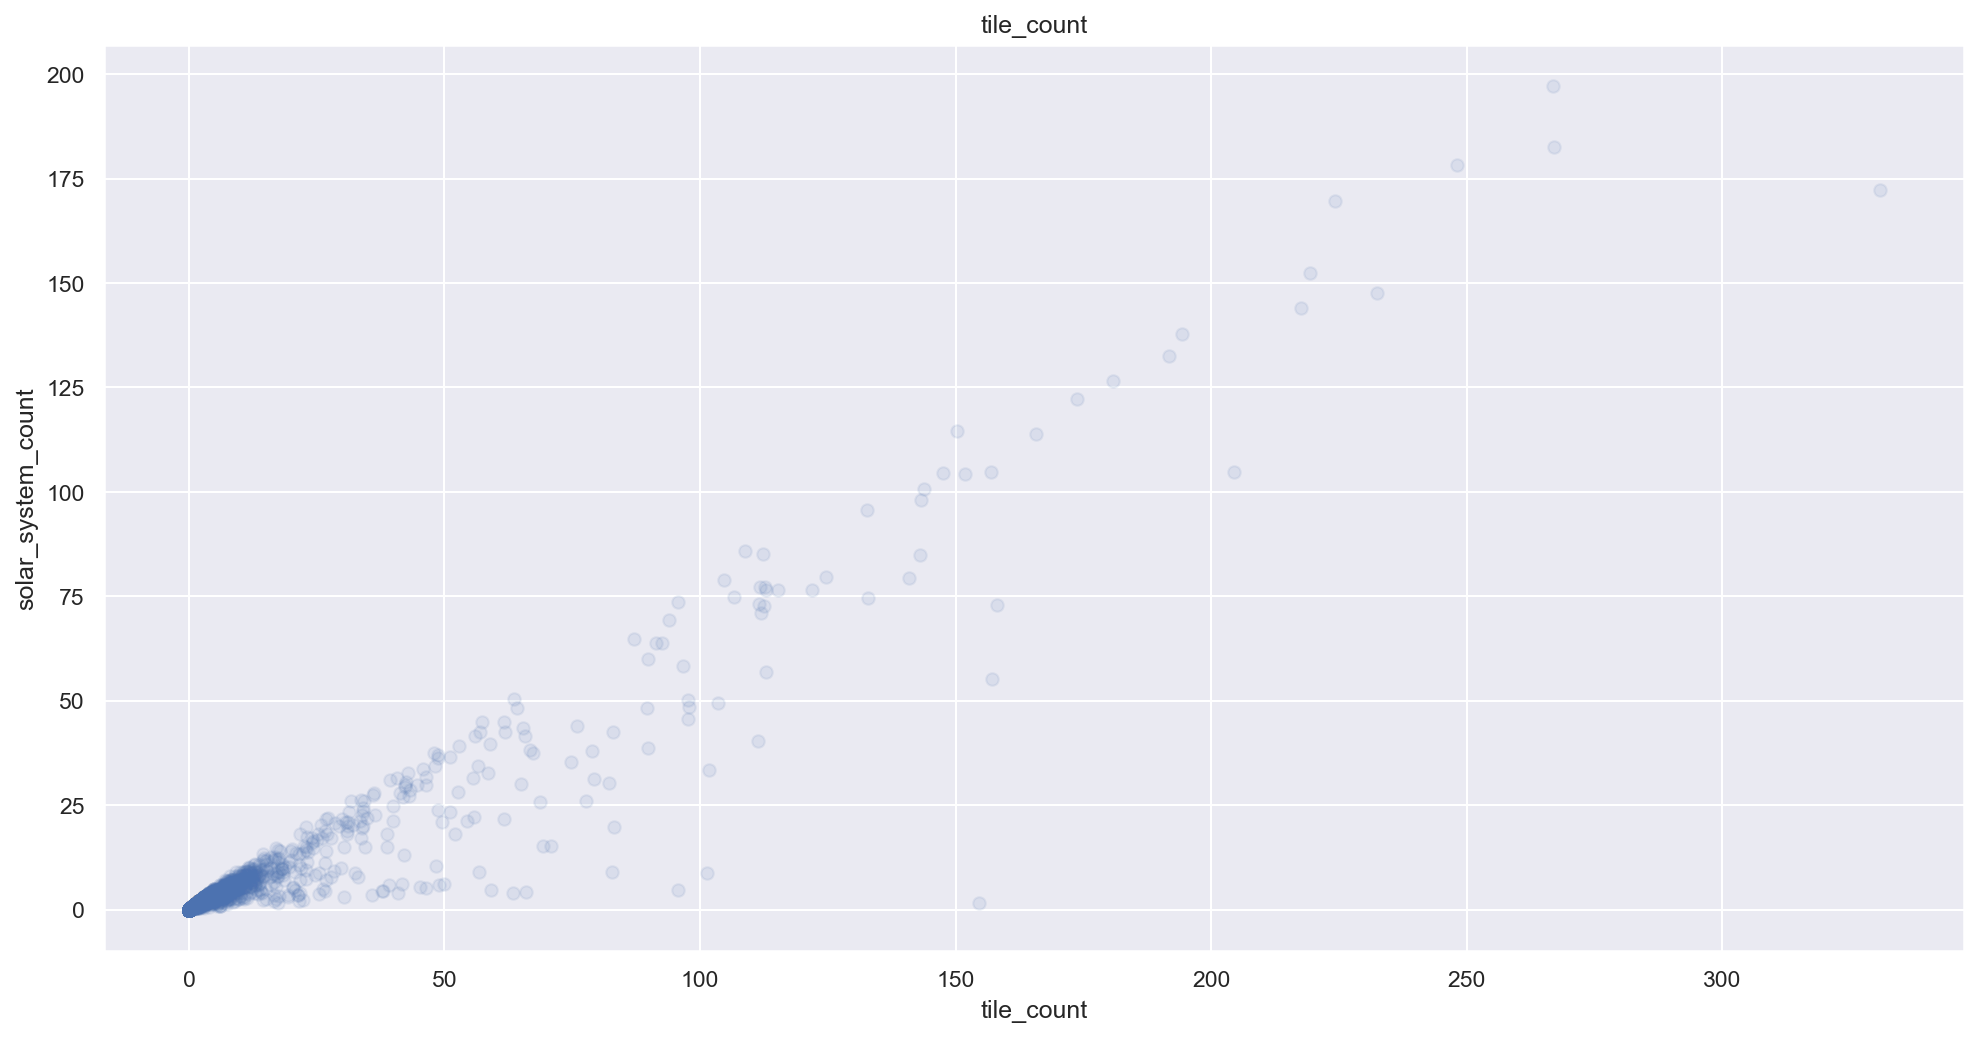

<Figure size 15000x15000 with 0 Axes>

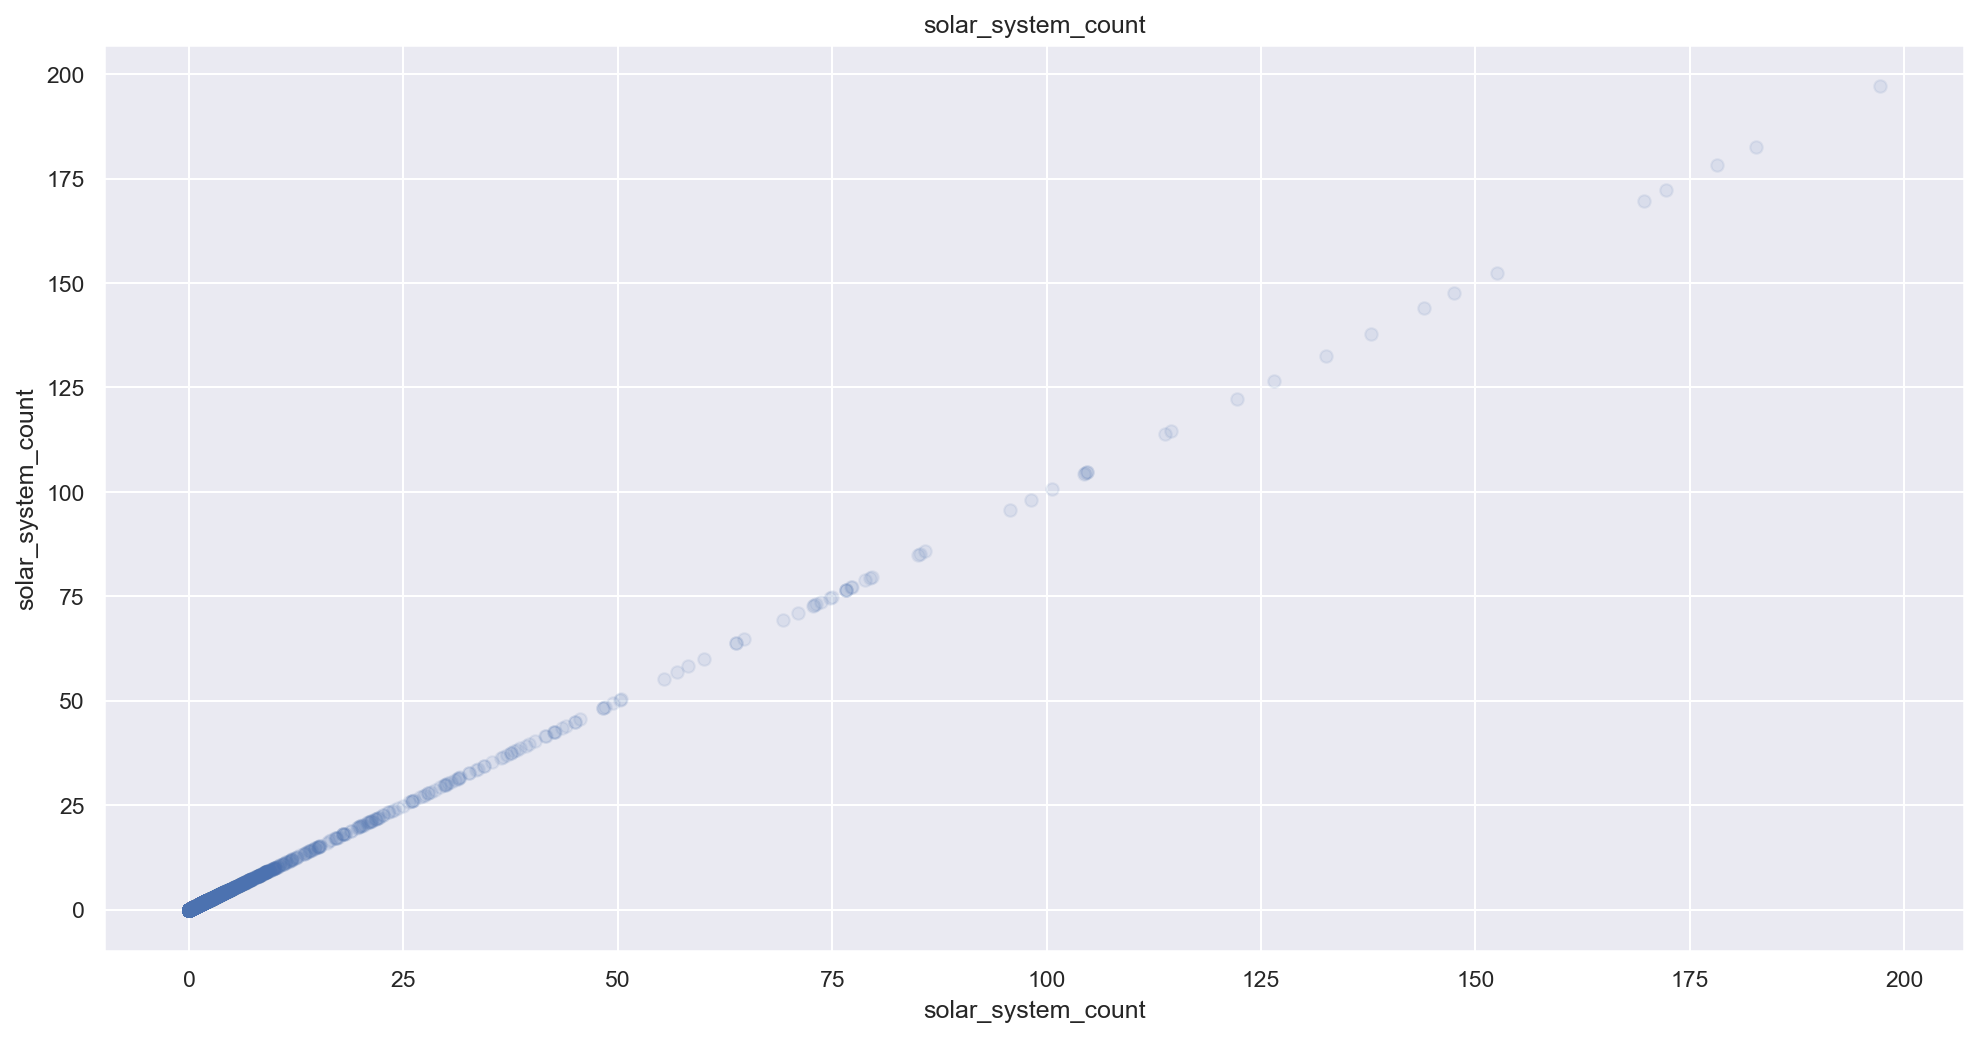

<Figure size 15000x15000 with 0 Axes>

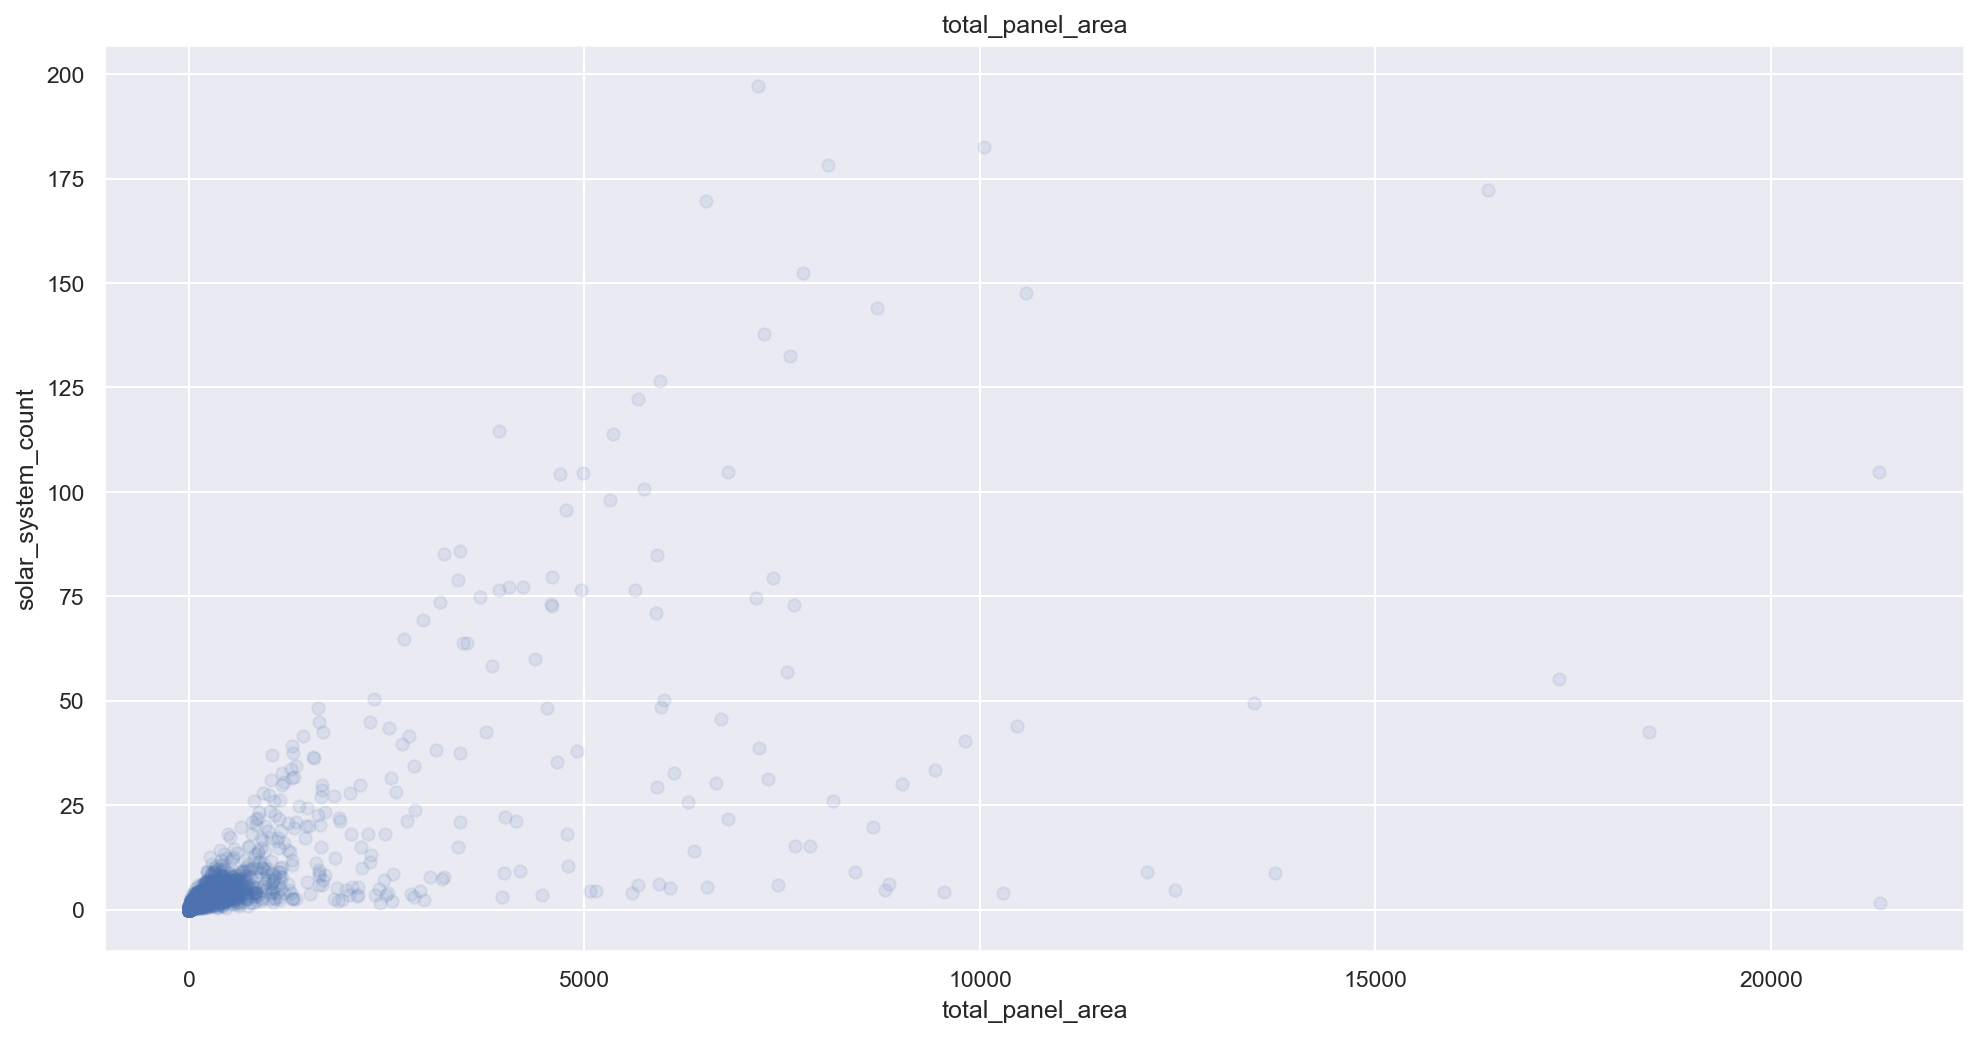

<Figure size 15000x15000 with 0 Axes>

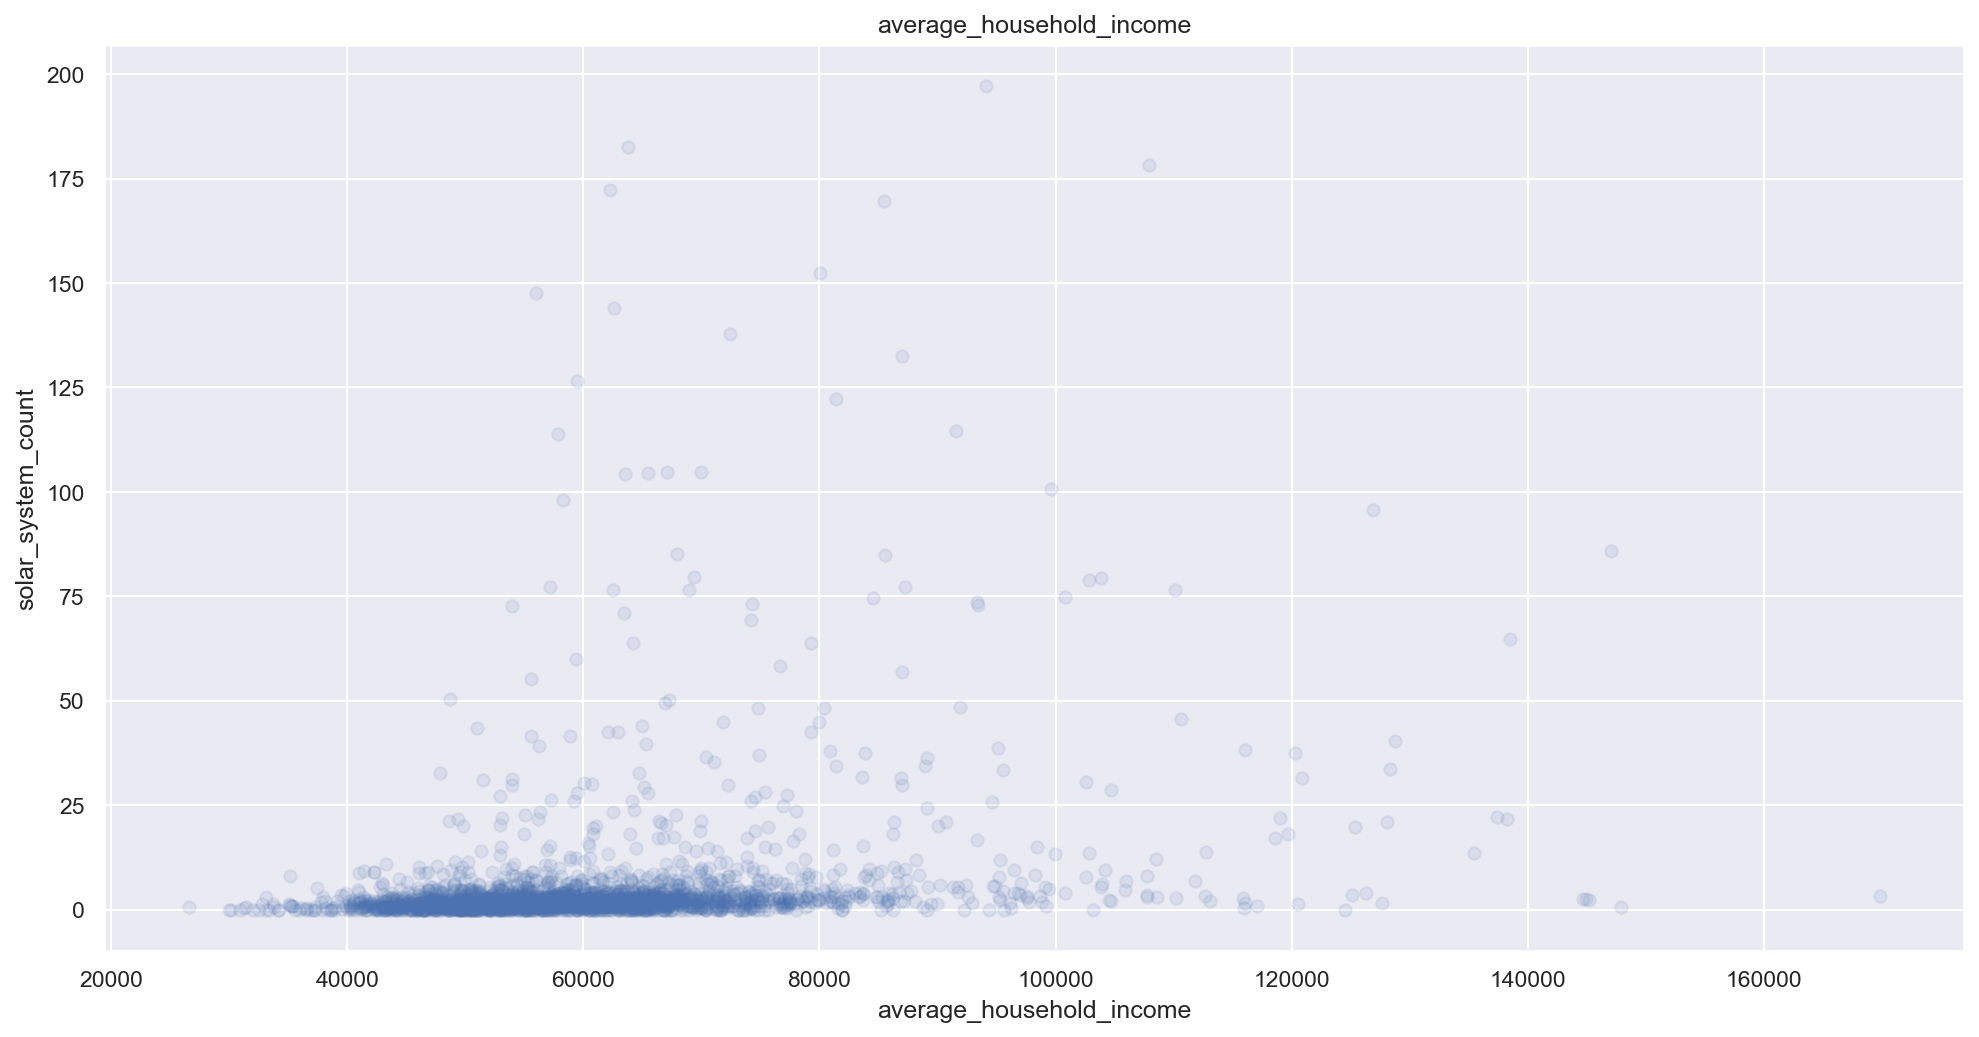

<Figure size 15000x15000 with 0 Axes>

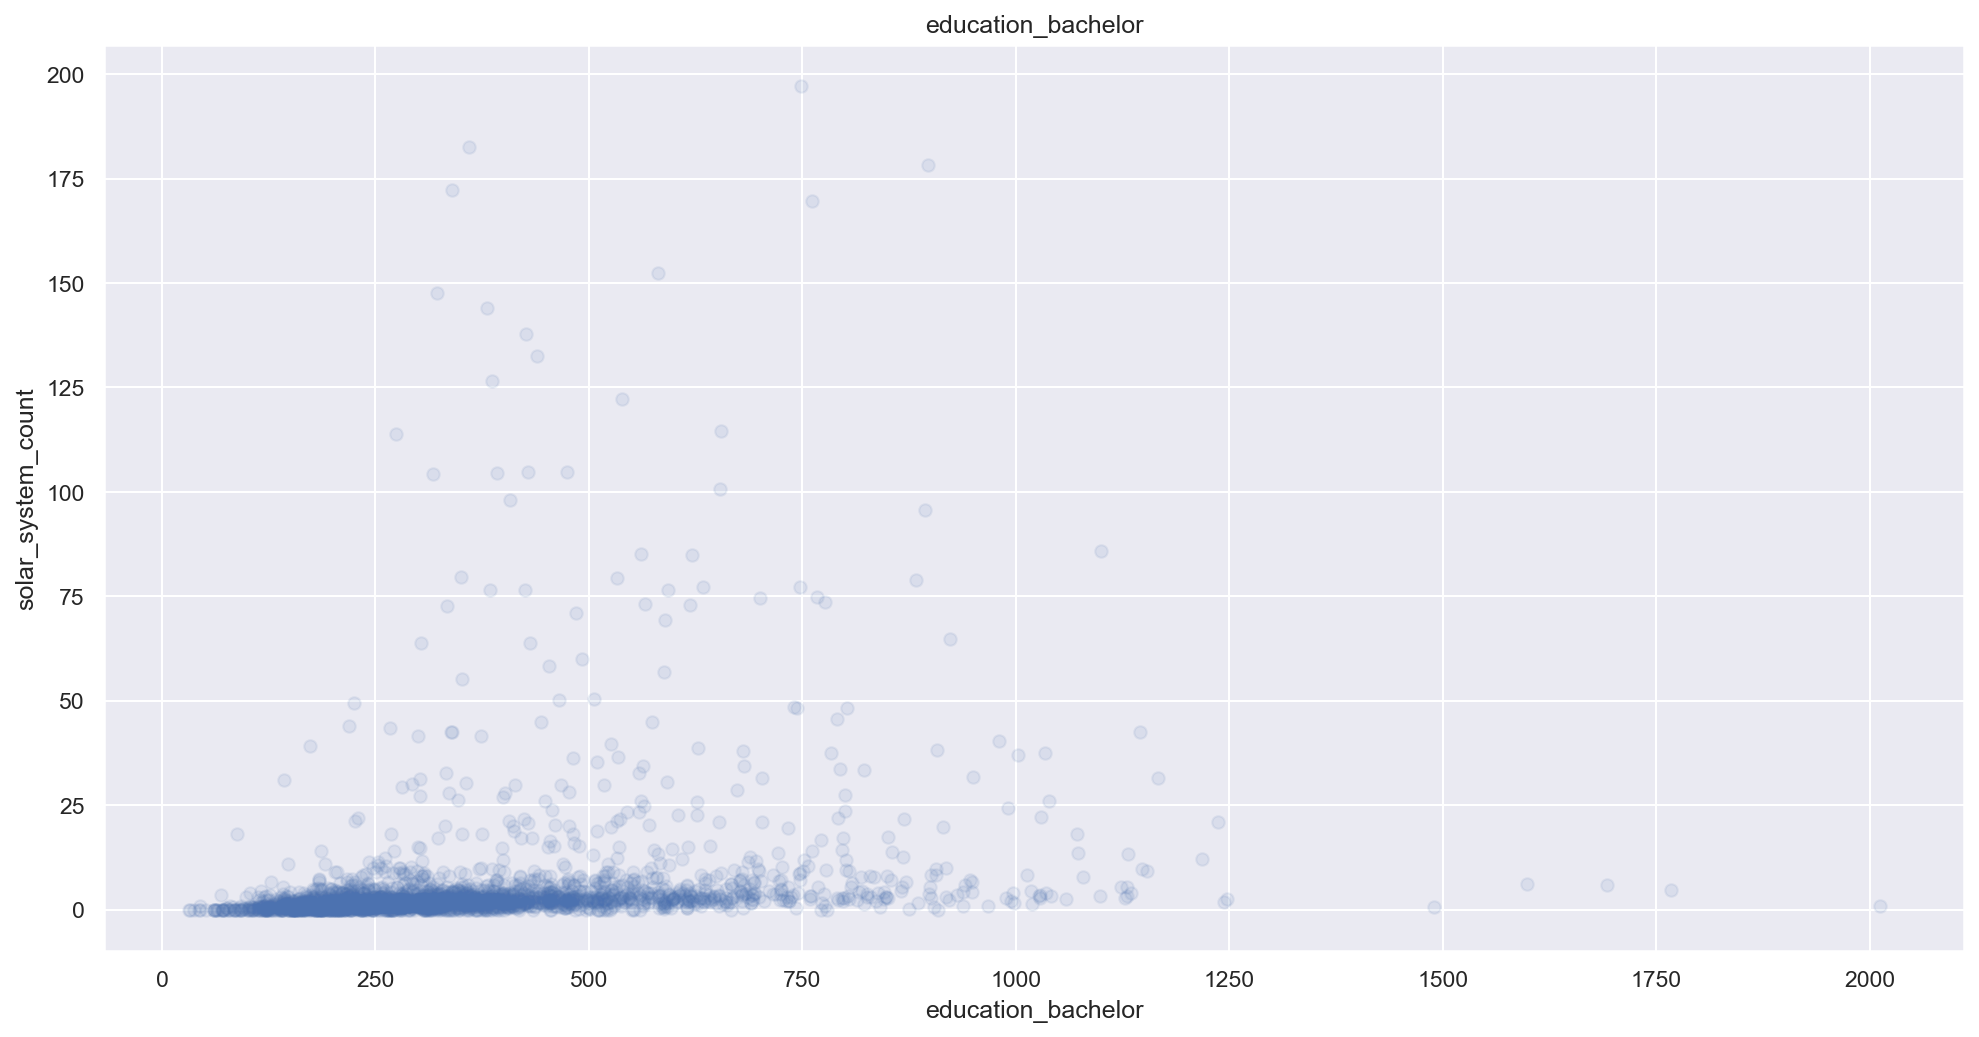

<Figure size 15000x15000 with 0 Axes>

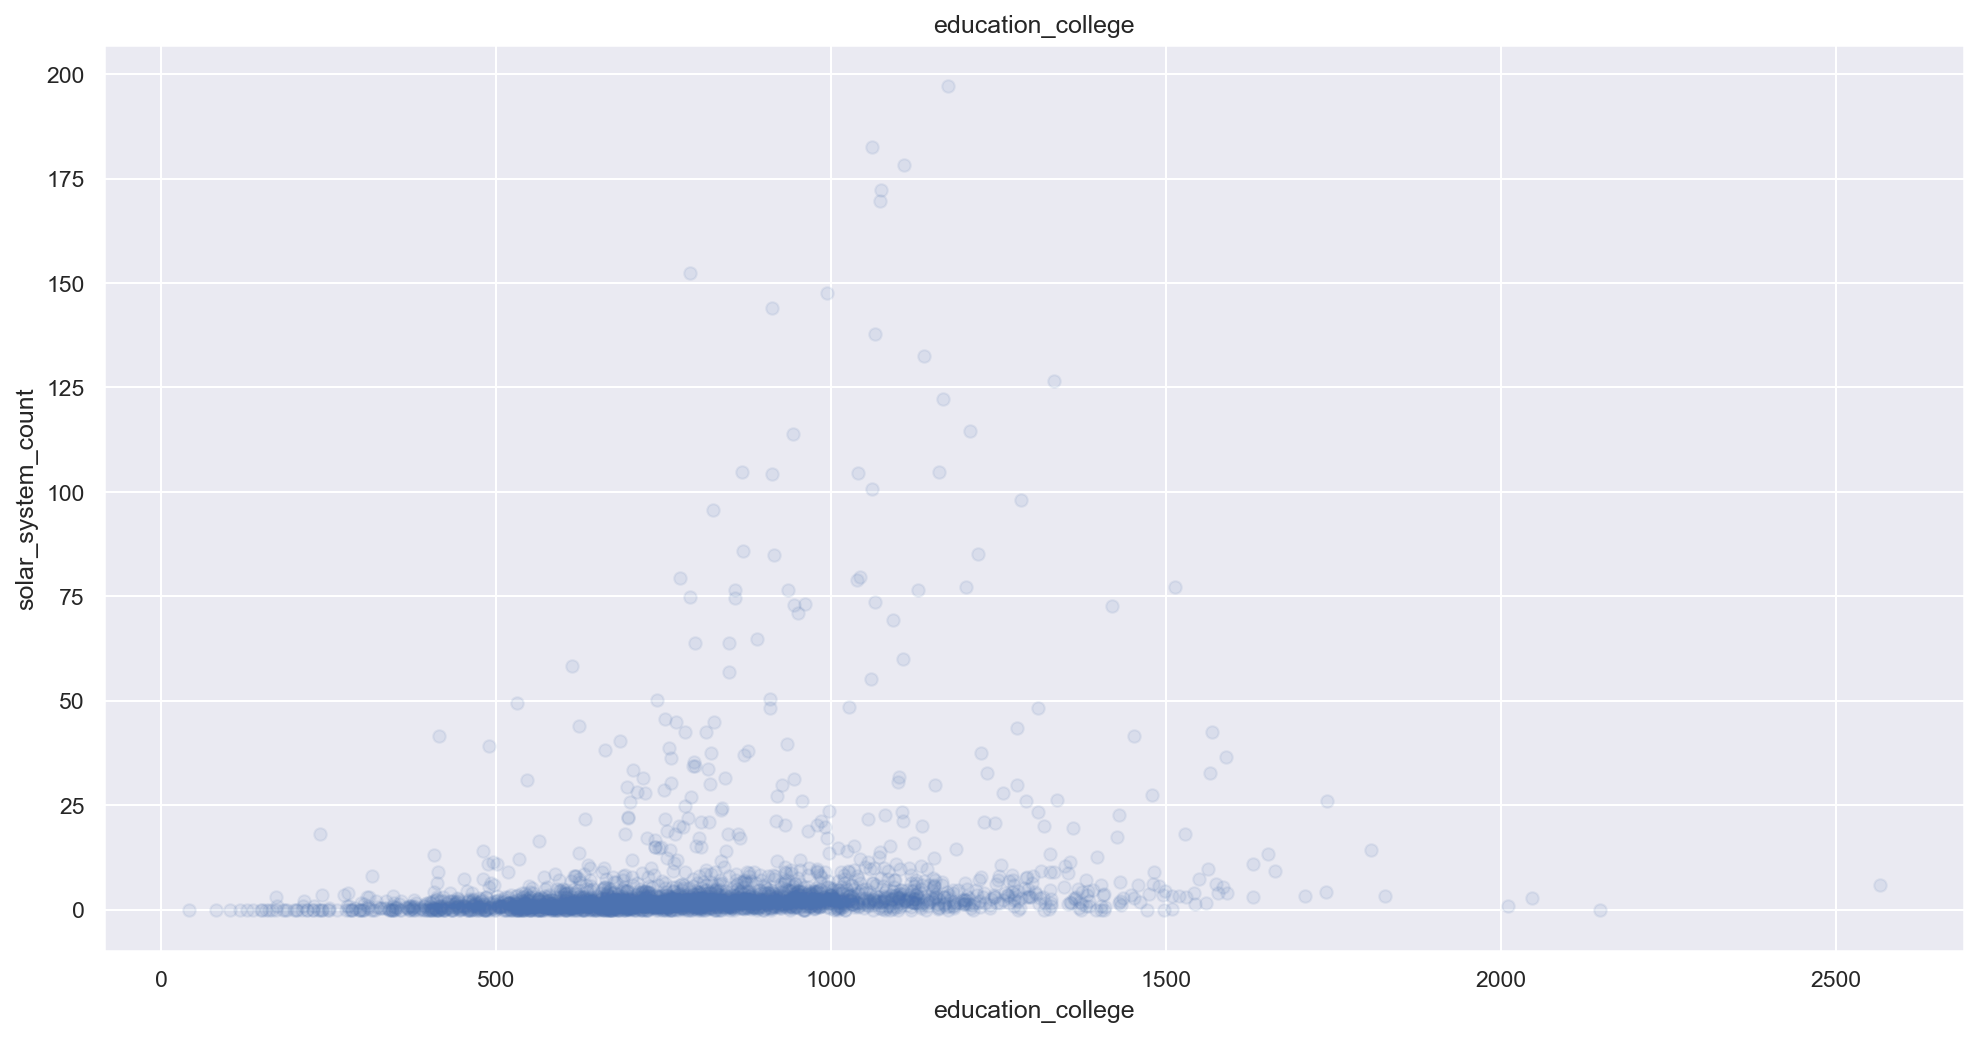

<Figure size 15000x15000 with 0 Axes>

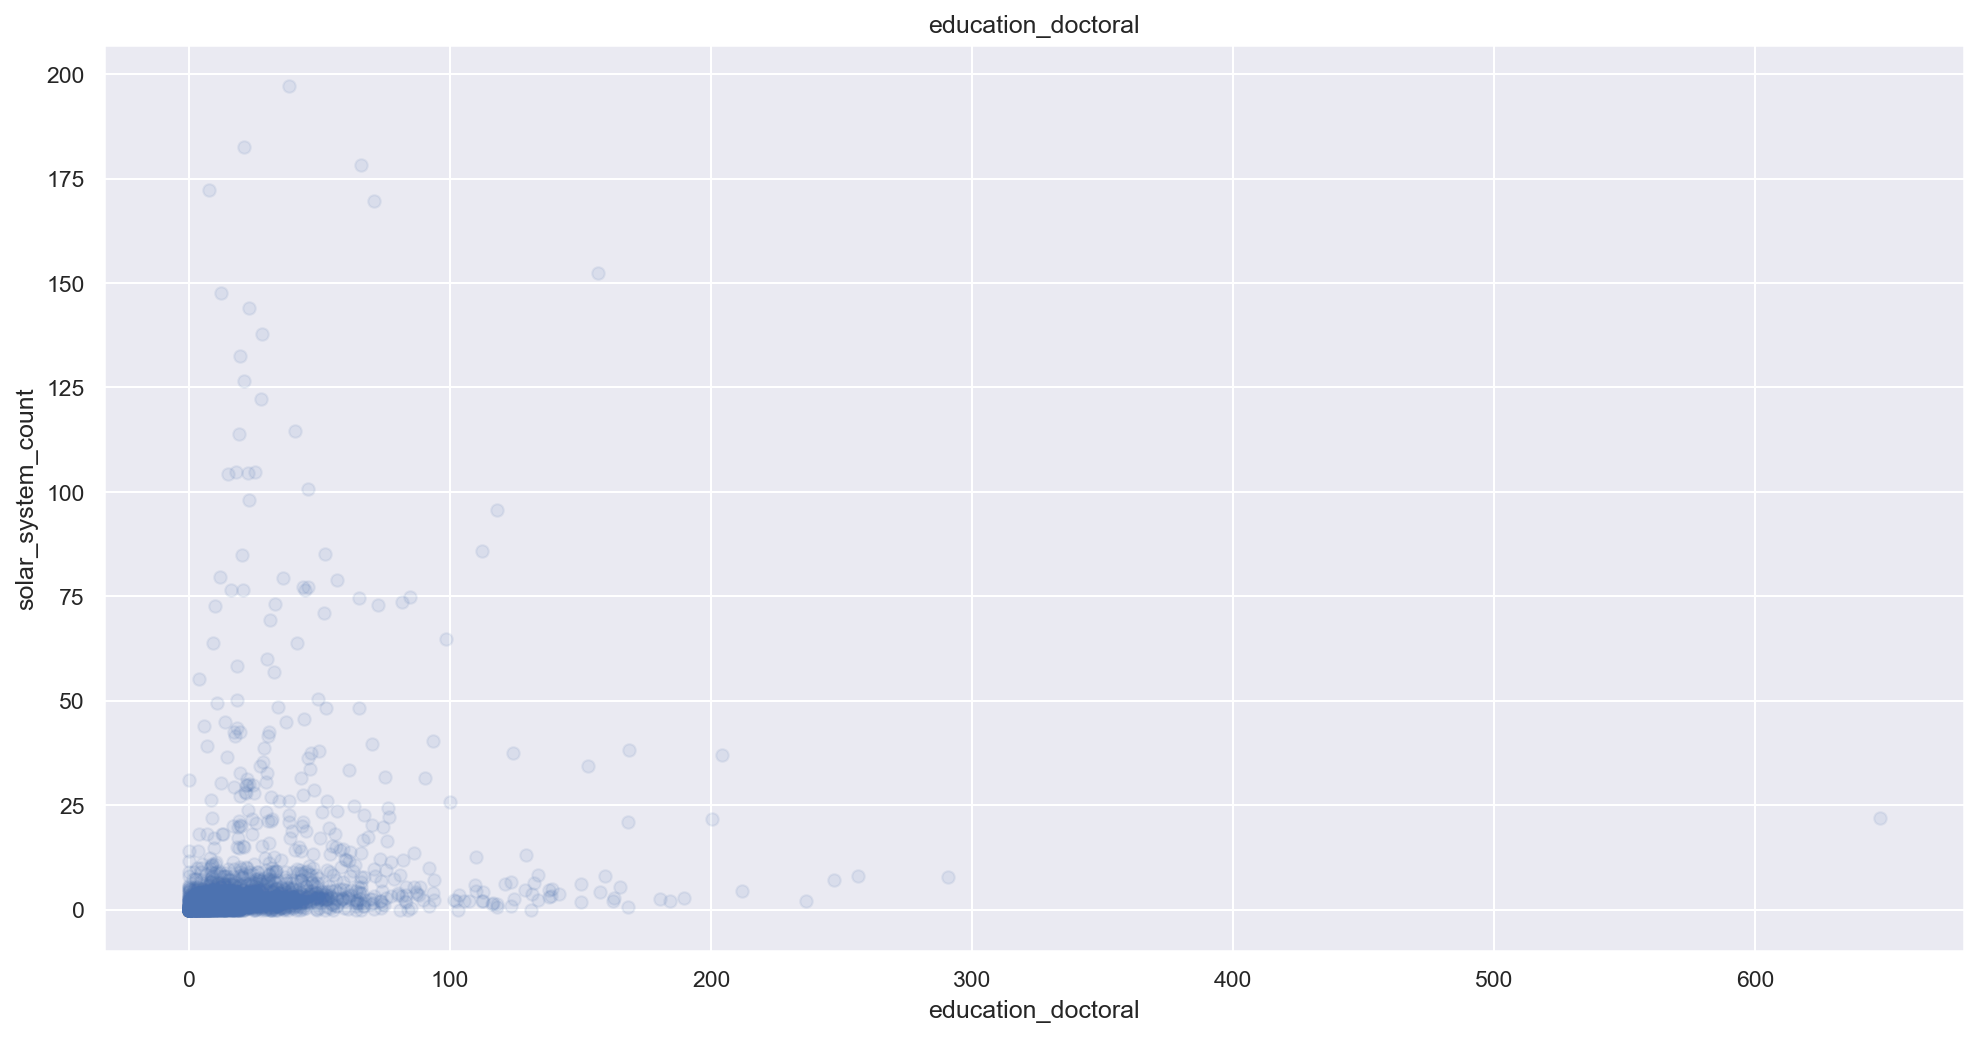

<Figure size 15000x15000 with 0 Axes>

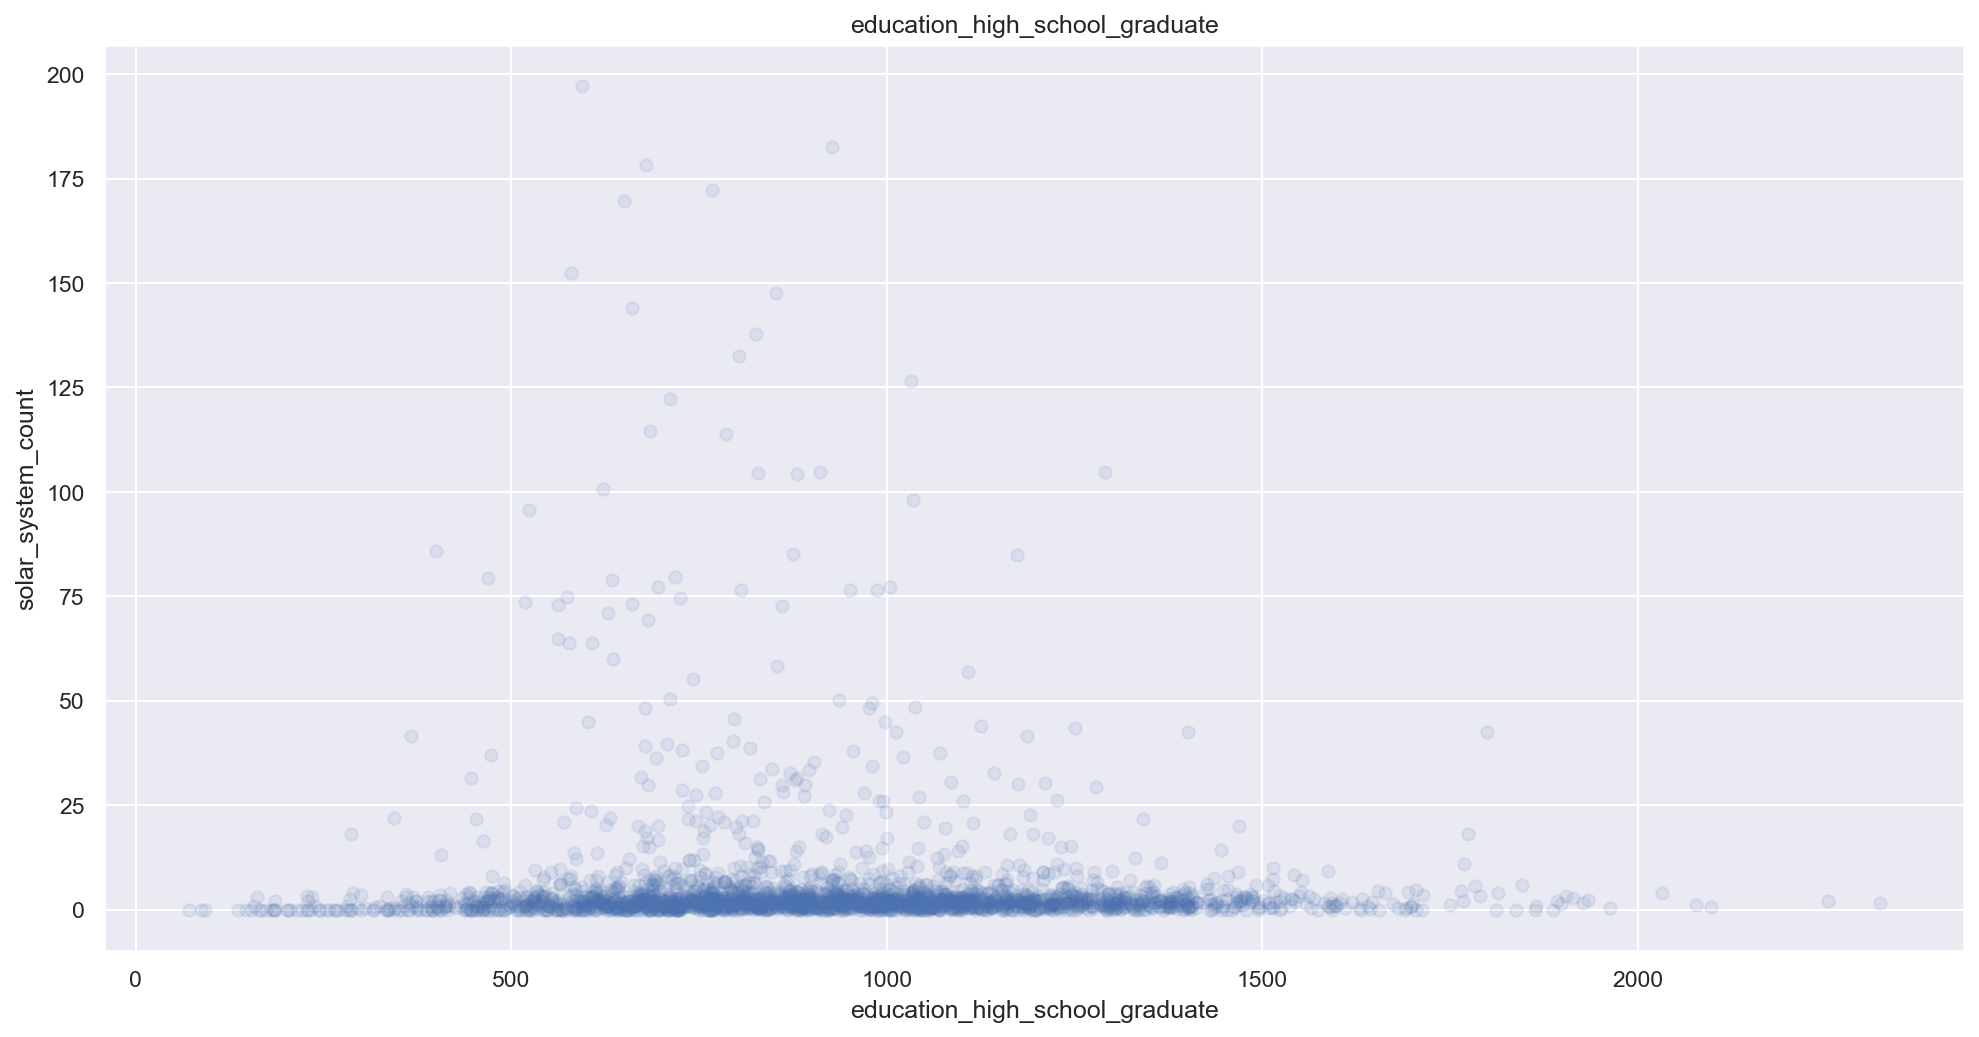

<Figure size 15000x15000 with 0 Axes>

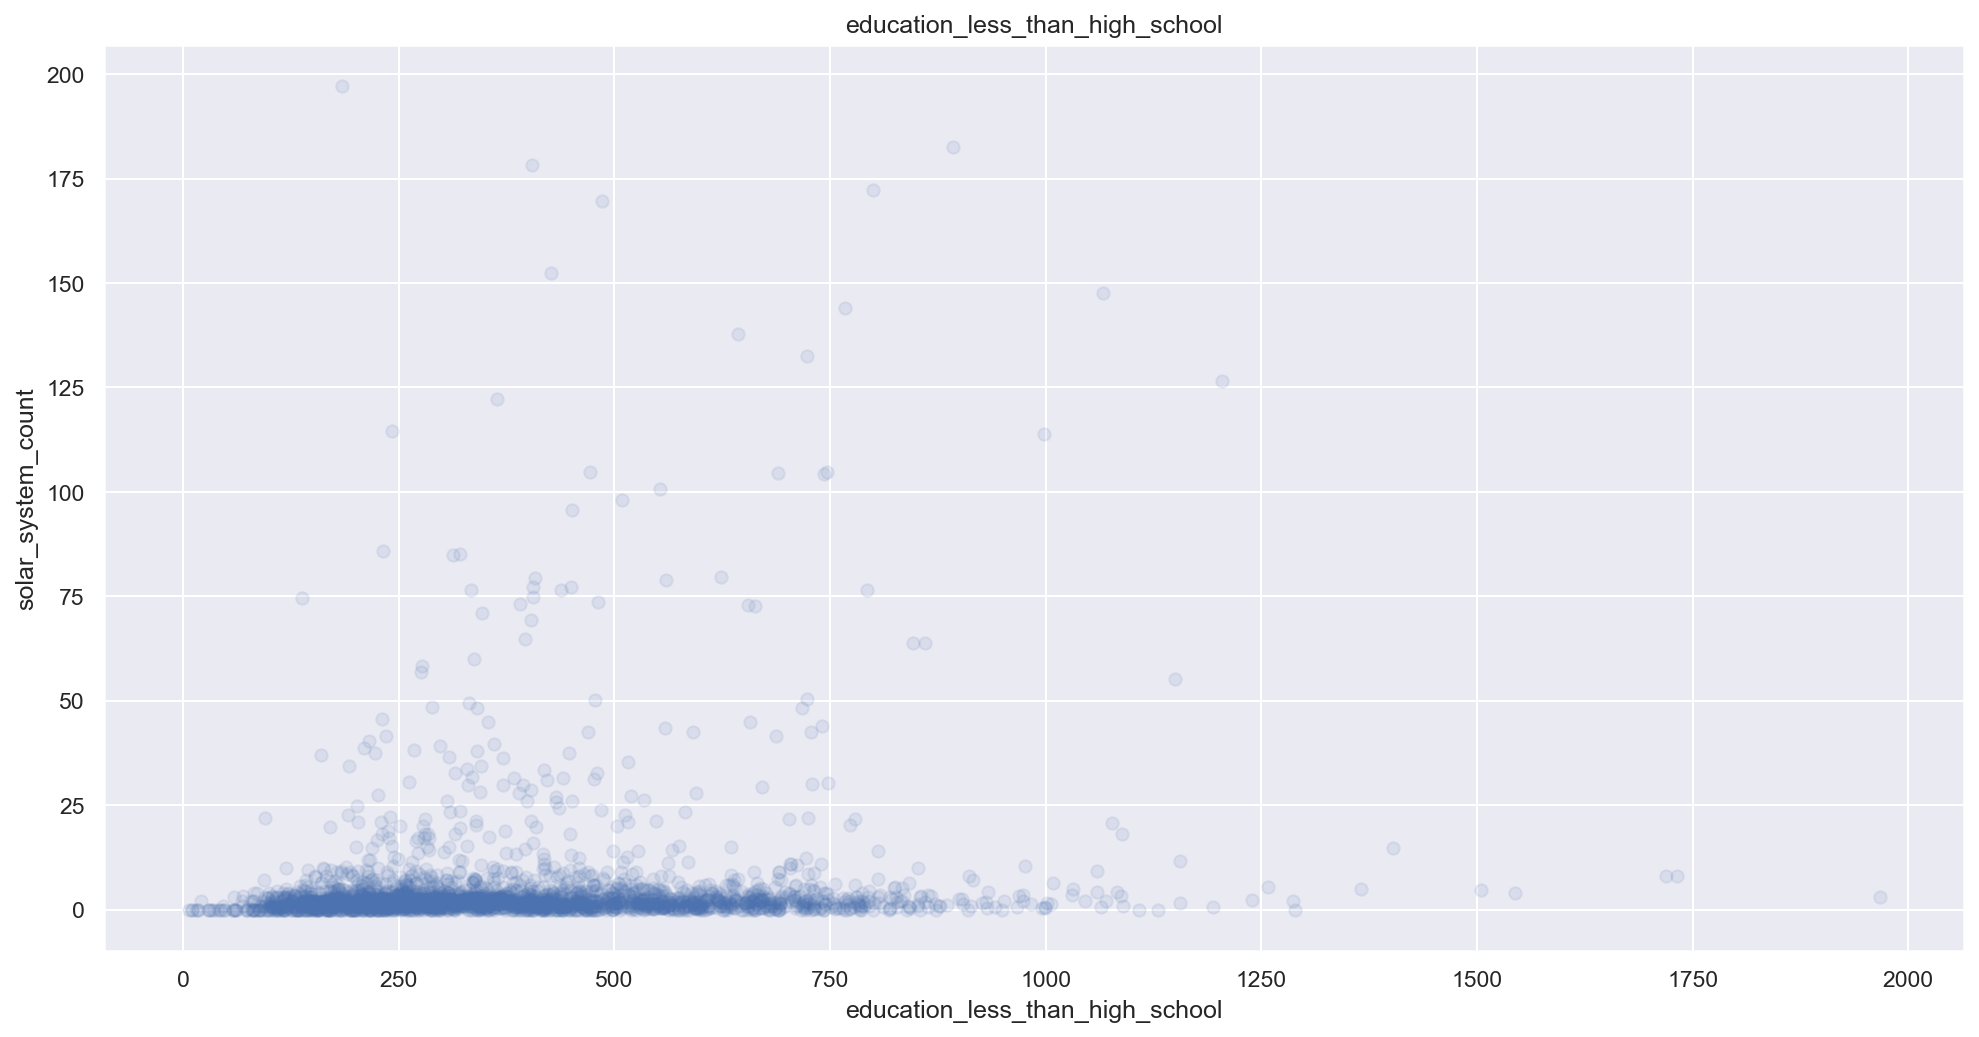

<Figure size 15000x15000 with 0 Axes>

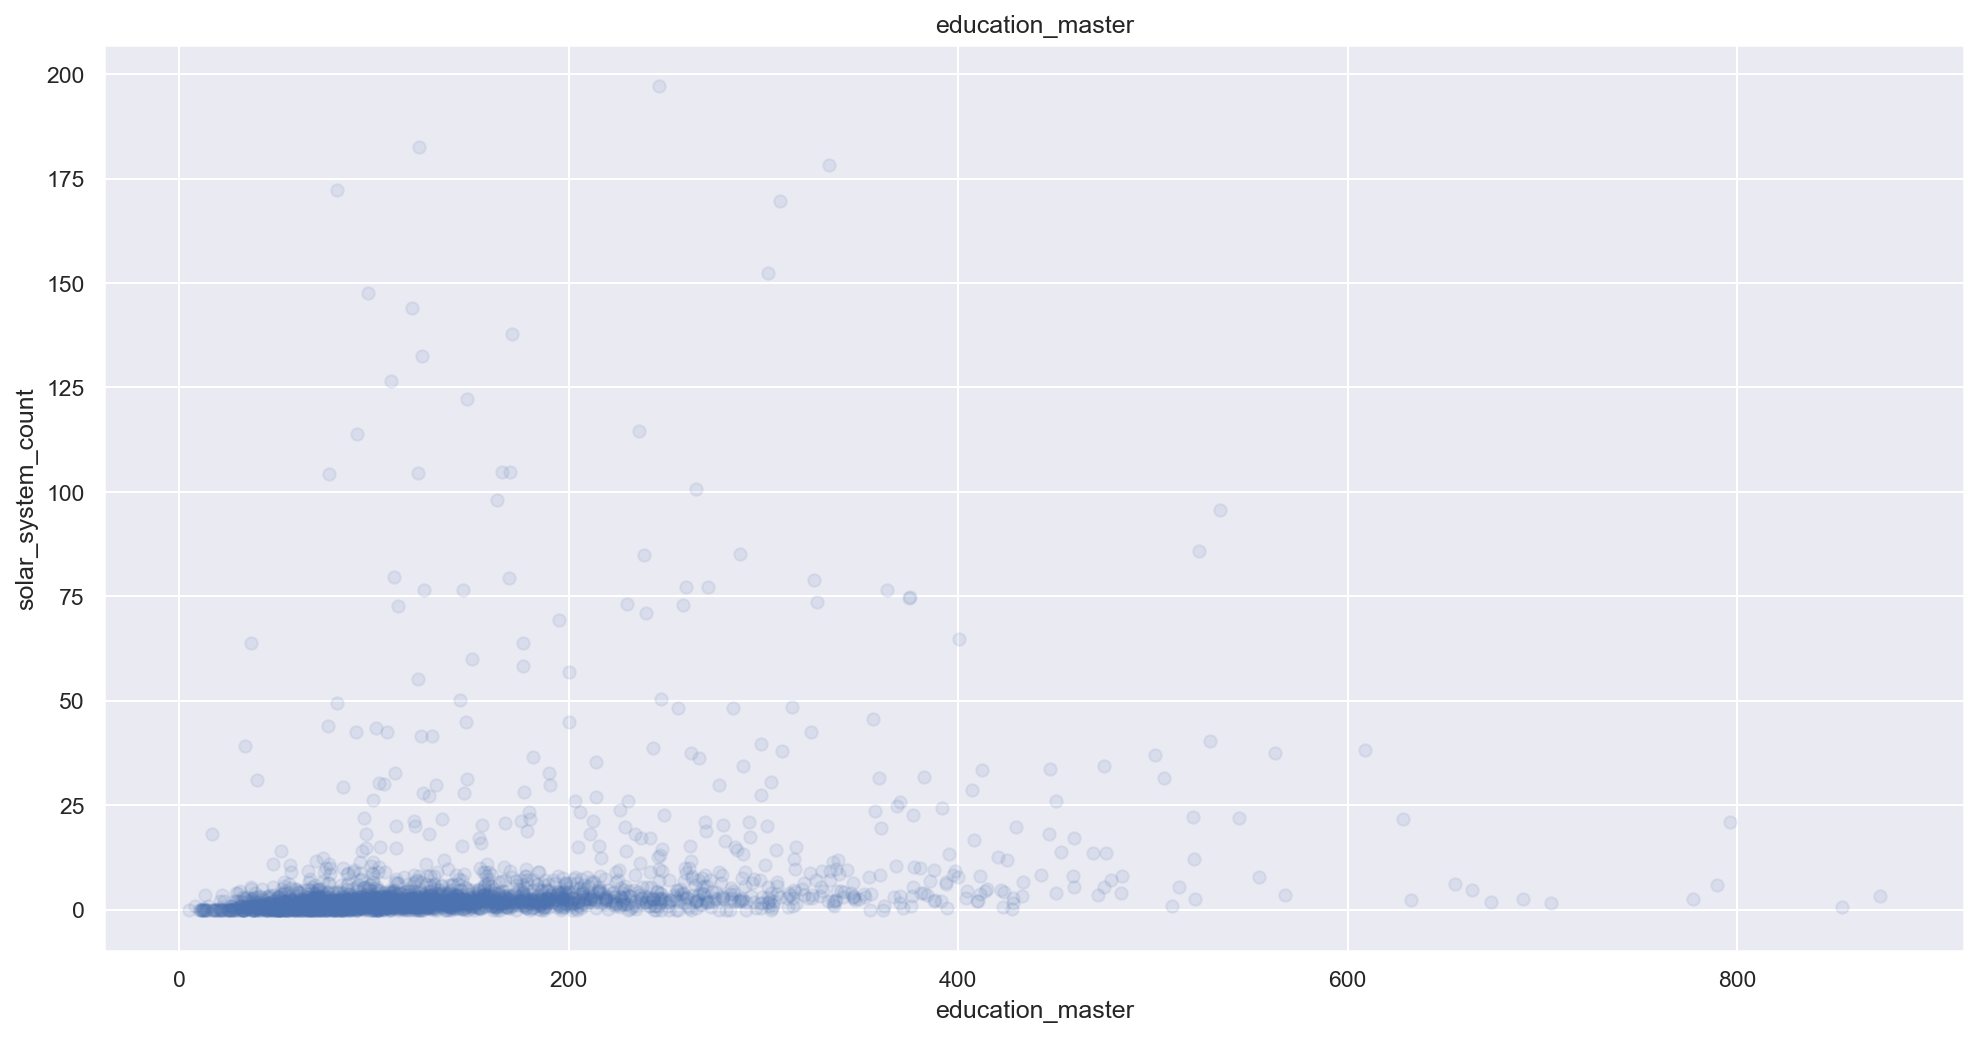

<Figure size 15000x15000 with 0 Axes>

In [26]:
def targetAndFeature(dataset, xIndex):
#     firstFeatureIndex = random.randint(0, len(dataset.columns))
#     secondFeatureIndex = random.randint(0, len(dataset.columns))

    firstFeatureLabel = dataset.columns[xIndex]
    secondFeatureLabel = "solar_system_count"
    
#     print(firstFeatureLabel)
#     print(secondFeatureLabel)
    firstFeatures = dataset[firstFeatureLabel]
    secondFeatures = dataset[secondFeatureLabel]

#     print(firstFeatures)
#     print(secondFeatures)
    
    plt.scatter(firstFeatures, secondFeatures, alpha = 0.10)
    plt.xlabel(firstFeatureLabel)
    plt.ylabel(secondFeatureLabel)
    plt.title(firstFeatureLabel)
    plt.figure(figsize=(100, 100))
    plt.show()

    #prints all features and the target variable
    
count = 0
for i in range(len(deep_solar.columns)):
    if count < 10:
        targetAndFeature(deep_solar, i)
    count += 1

**Sacbee:** Based on the visulaizations below, most counties in sacbees are majority democratic. The median for democrat is around 42 percent and for republicans it is around 25.

<AxesSubplot:>

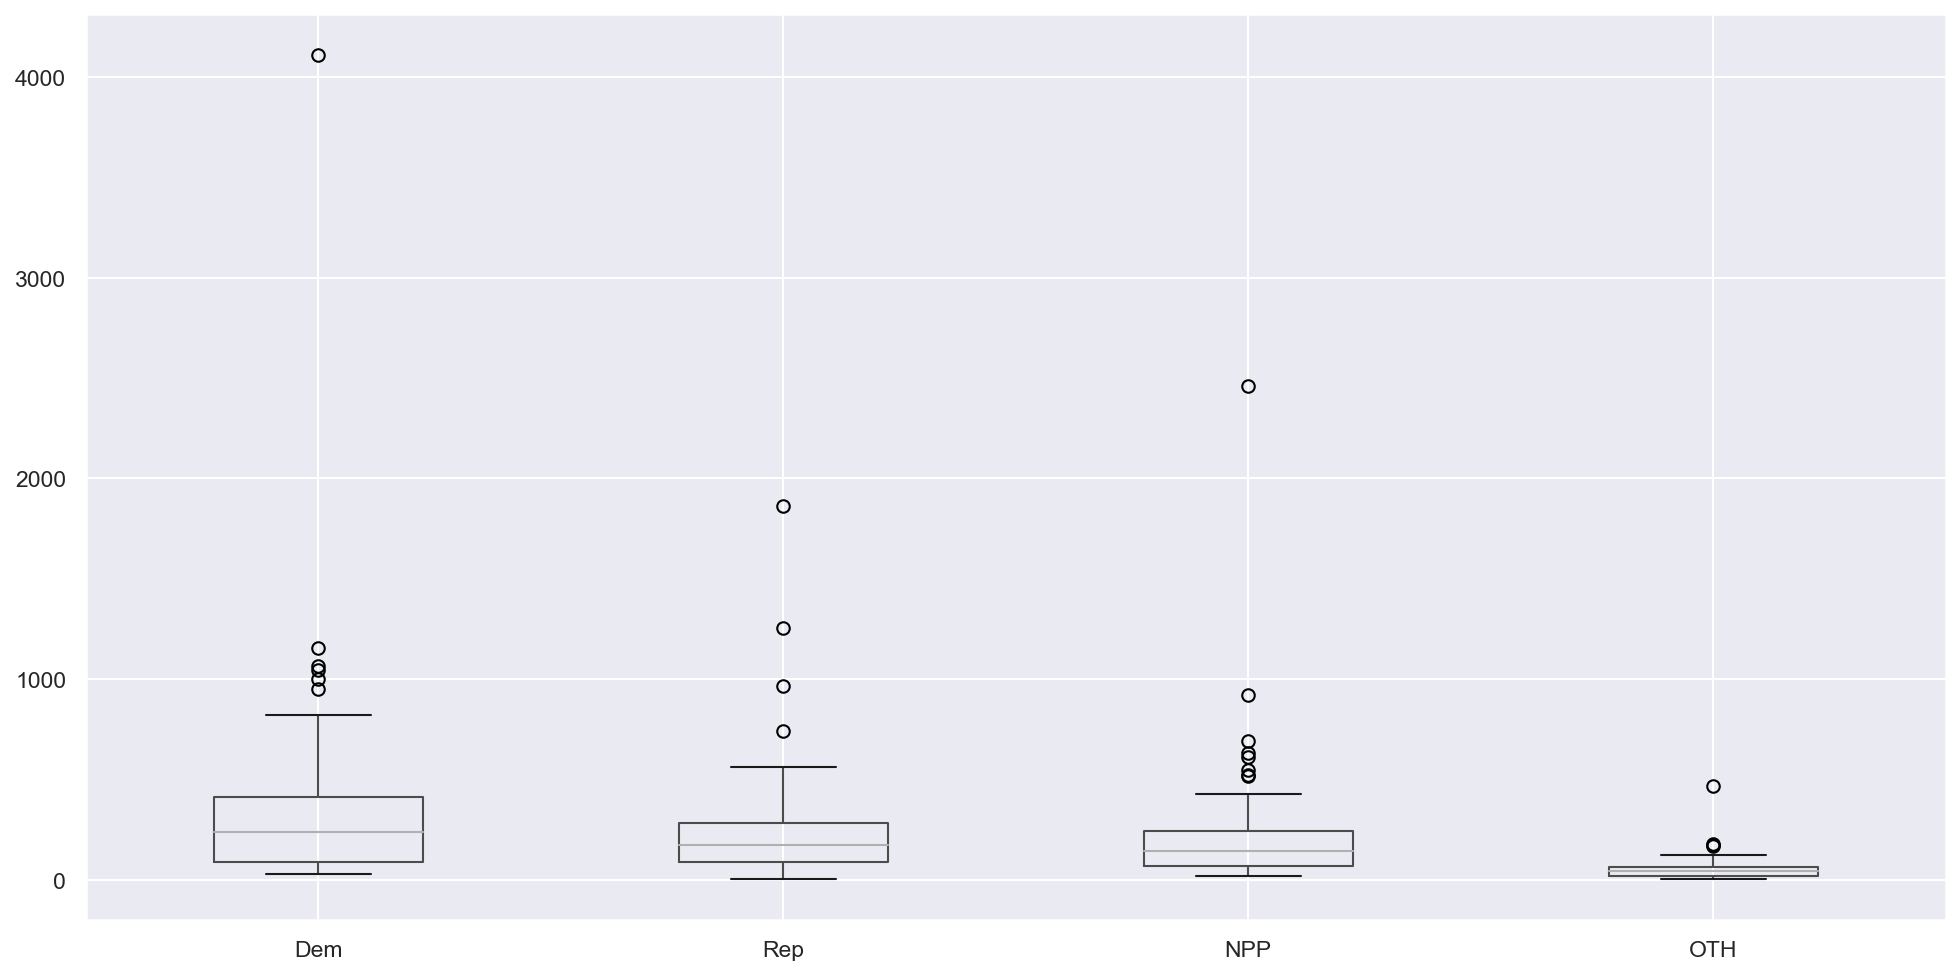

In [27]:
SacBee.boxplot(column = ["Dem", "Rep", "NPP", "OTH"])

array([[<AxesSubplot:title={'center':'Dem'}>,
        <AxesSubplot:title={'center':'Rep'}>],
       [<AxesSubplot:title={'center':'NPP'}>,
        <AxesSubplot:title={'center':'OTH'}>]], dtype=object)

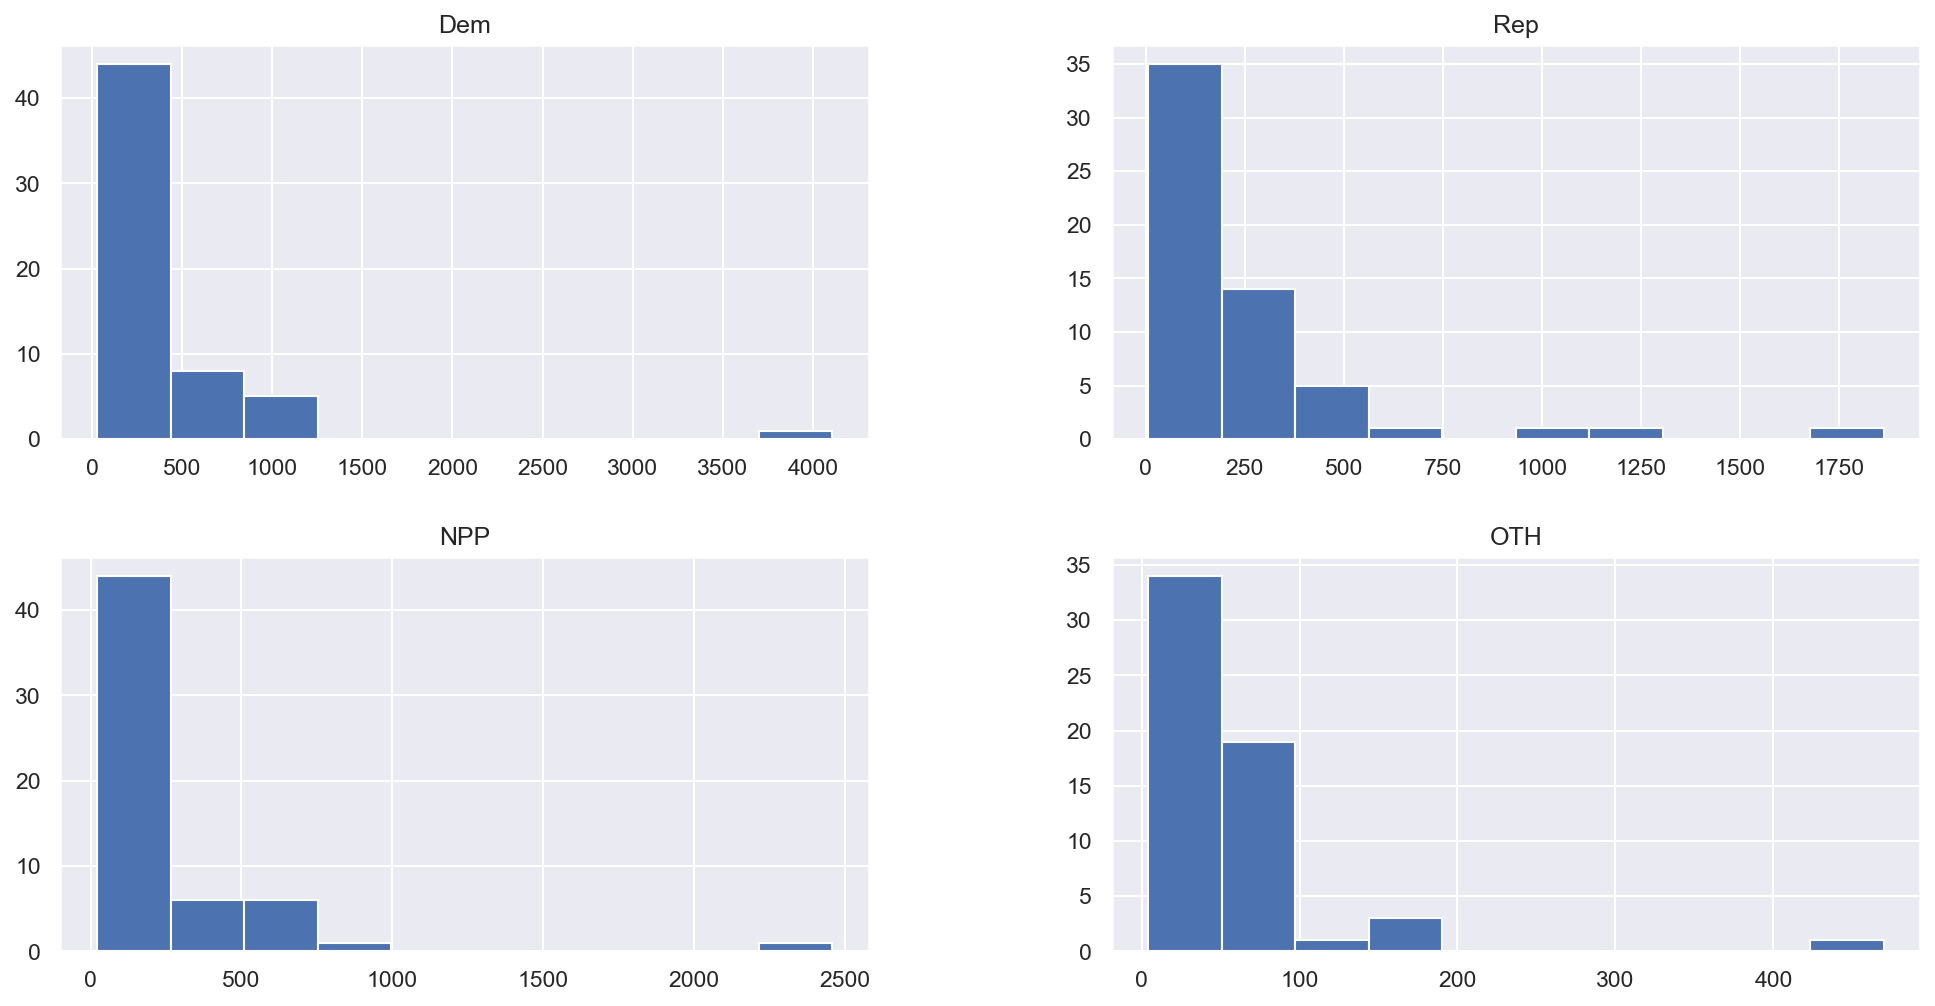

In [28]:
SacBee.hist(column =  ["Dem", "Rep", "NPP", "OTH"])

**Tracking The Sun:** Based on the graph, most of the rebates or grants are typically less than around 20000 with a few exceptions.

<AxesSubplot:>

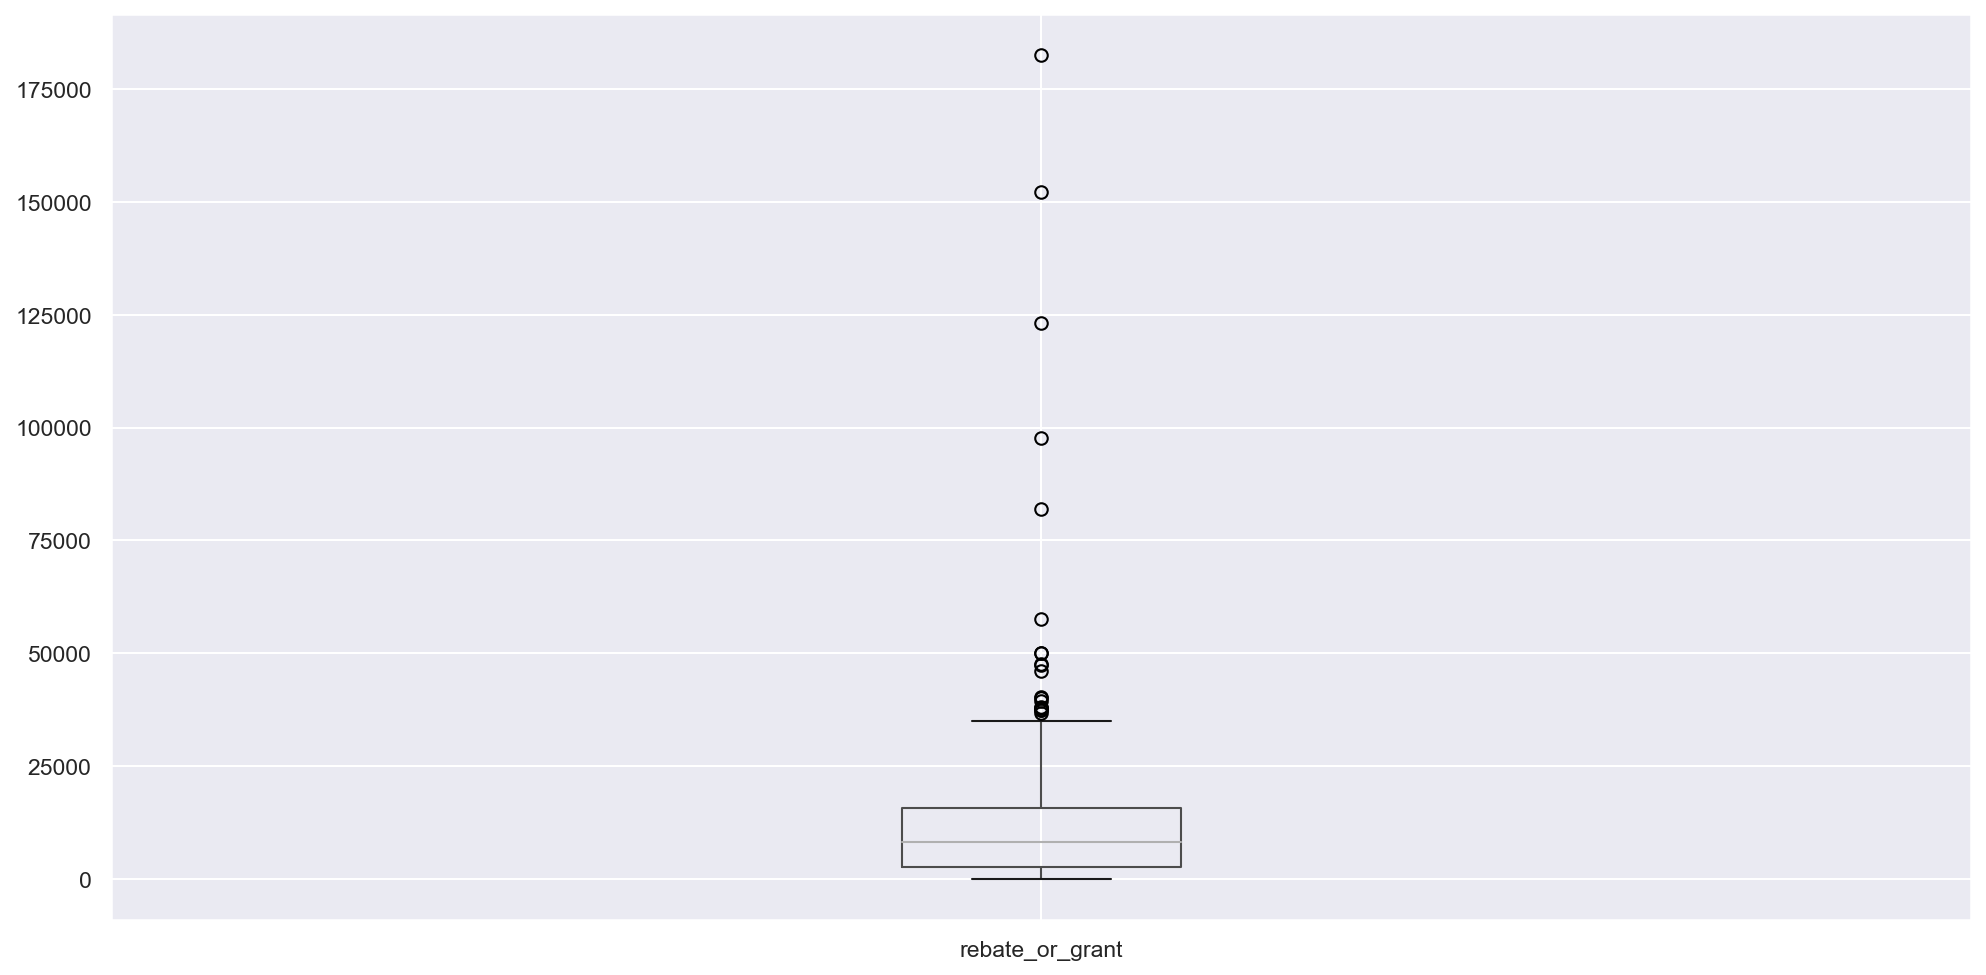

In [29]:
tracking_the_sun.boxplot("rebate_or_grant")

**US Zipcode to County State to FIPS:** No EDA was needed to be done for this dataset, because we only used it to convert zip codes and county names to state county FIPS codes. All the variables in this dataset were also categorical variables.

## 1.7 Forecasting and Prediction Modeling (25 points)

We started by importing all the datasets we needed to use and removing the null values. When we created the X and y, we made sure to remove columns that directly give us the answer such as tile_count, solar_system_count, etc. Before training the model, we standardized the columns by using StandardScaler(). We fit the model on the training set and see how the model performs on the test data. We do this process for both lasso and ridge regression.

For the neural network model, we used the Keras Deep Learning library to make a Sequential() model with a hidden layers with 4 neurons, and an output layer with one neuron. We used 1000 epochs and a loss function of 'mean_squared_error' and 'adam' as our optimizer. 

### 1.7.1 Prediction Problem #1 (Using DeepSolar and Tracking The Sun)

In [30]:
X = all_united_states.drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
y = all_united_states['solar_system_count']
cols = X.columns.tolist()
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**1.7.1.a) Lasso Model**

In [31]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("LASSO TRAINING SCORE:", train_score)
print("LASSO TEST SCORE:", test_score)

LASSO TRAINING SCORE: 0.7606161567370083
LASSO TEST SCORE: 0.714067898400872


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Lasso Regression')

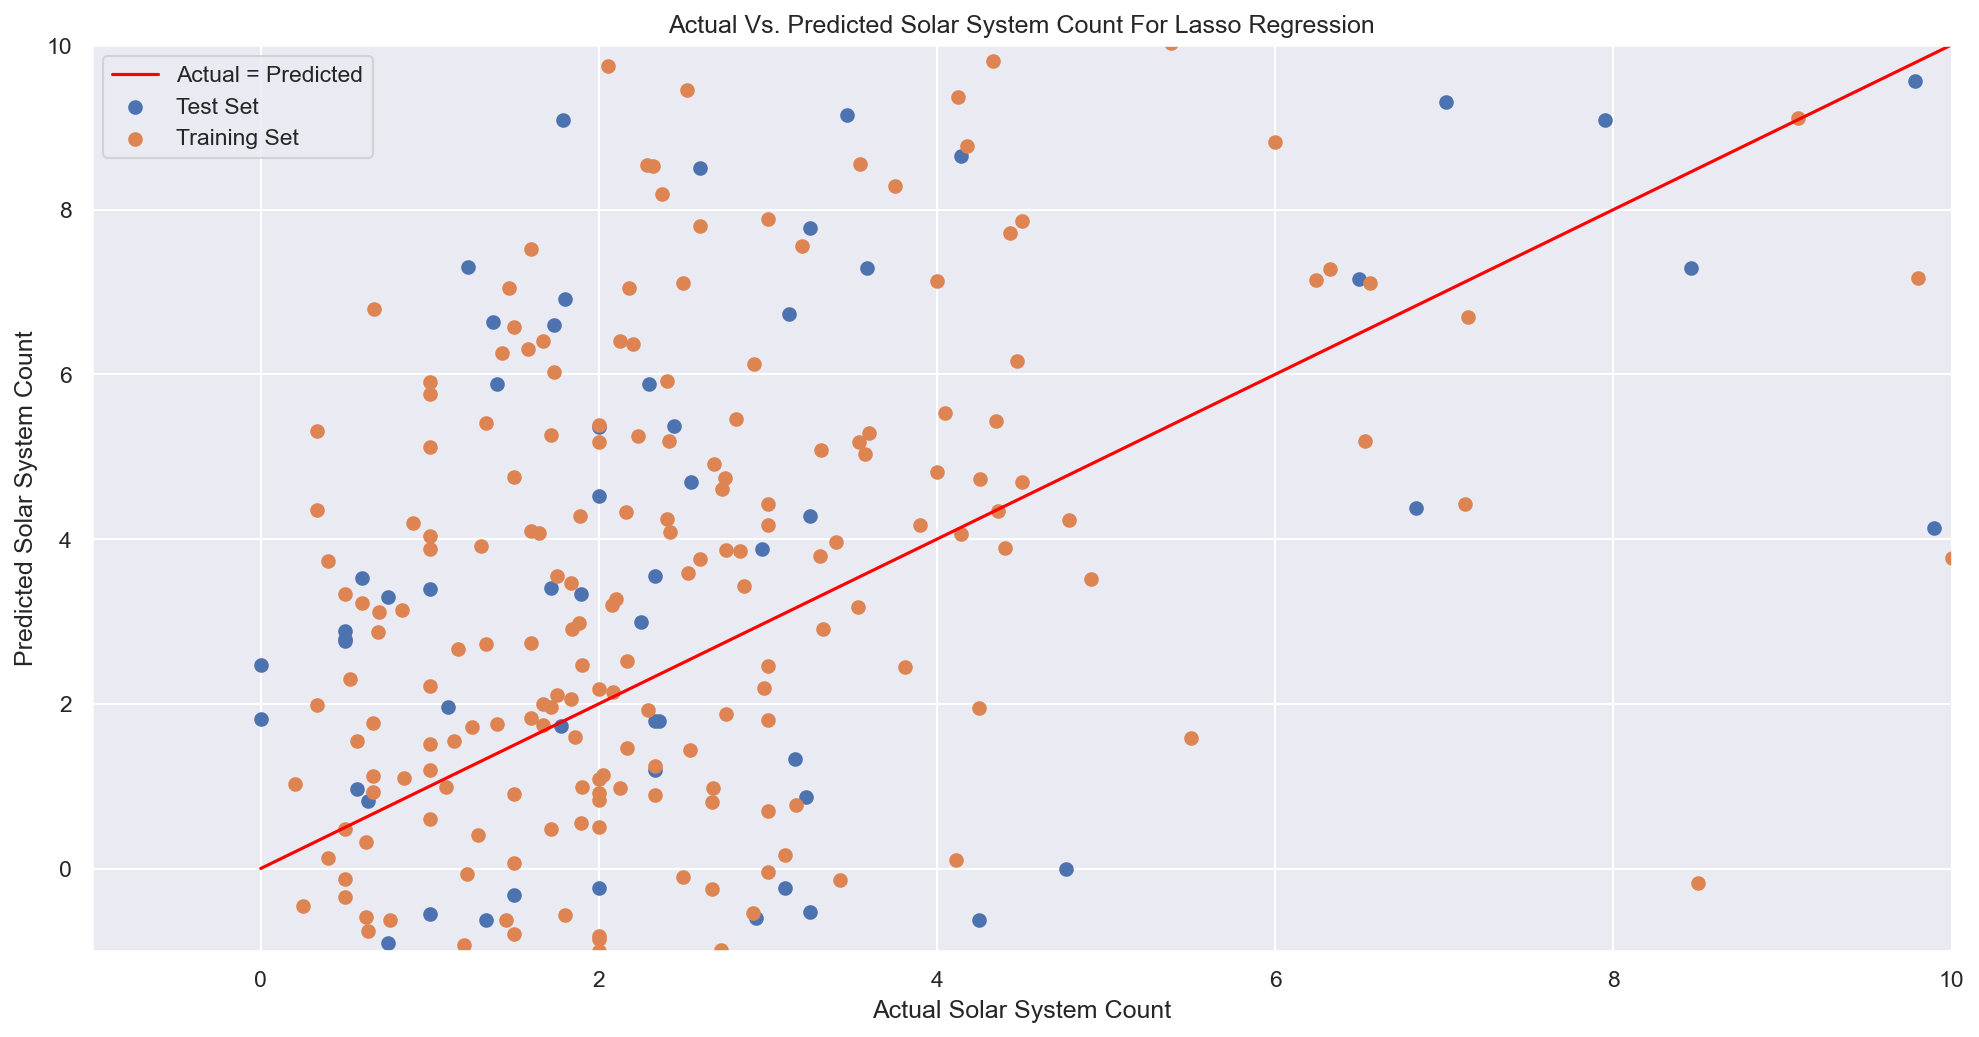

In [32]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Lasso Regression")

**1.7.1.b) Ridge Model**

In [33]:
clf = linear_model.Ridge()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Ridge TRAINING SCORE:", train_score)
print("Ridge TEST SCORE:", test_score)

Ridge TRAINING SCORE: 0.888038597045371
Ridge TEST SCORE: 0.706331762175562


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Ridge Regression')

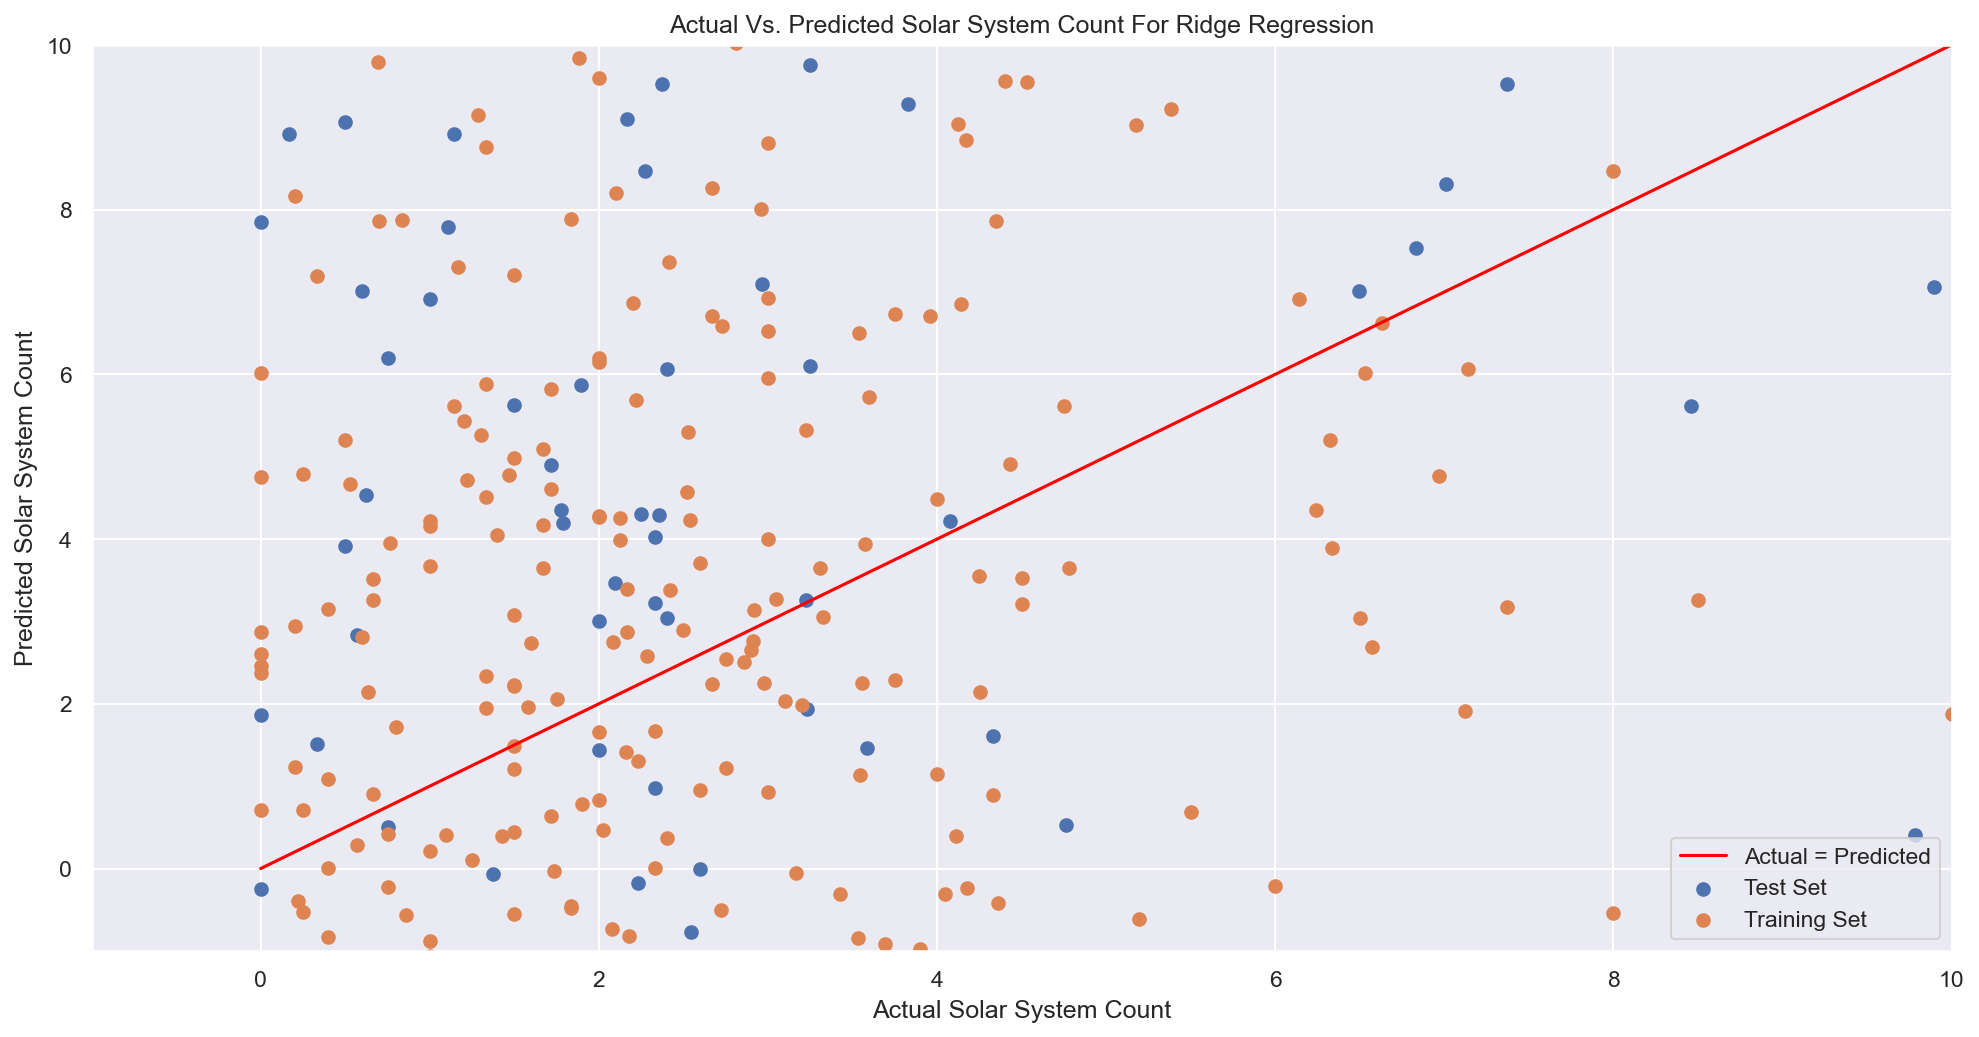

In [34]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Ridge Regression")

**1.7.1.c) Neural Networks**

In [35]:
# Initialize the model
model = Sequential()

# Initialize layers
num_dim = X_train.shape[1]
# model.add(Dense(50, input_dim=num_dim, activation='relu')) 
# model.add(Dense(5, activation='sigmoid'))
# model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

model.add(Dense(4, input_dim=num_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose = 0)

y_pred=model.predict(X_train)

C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Neural Nets')

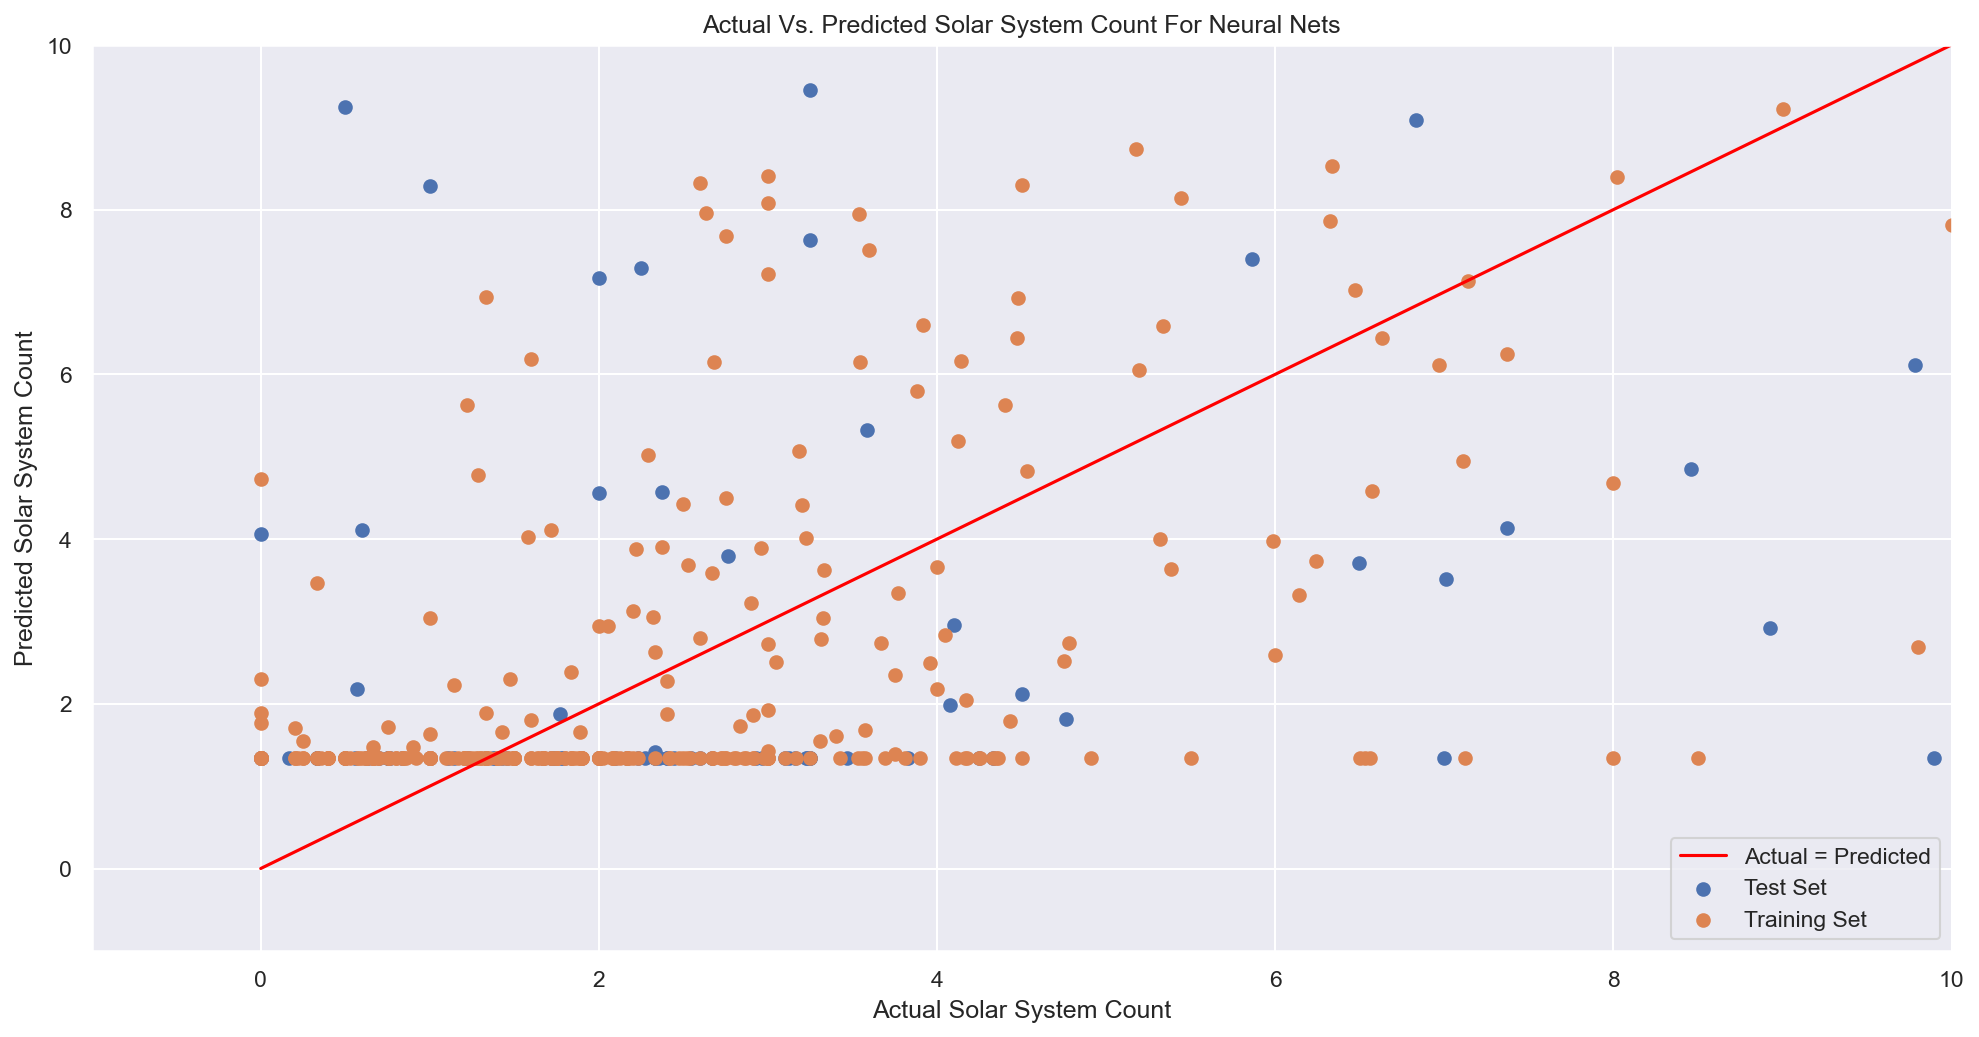

In [36]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Neural Nets")

In [37]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("R^2 For Neural Nets Train", r2_score(y_train, y_pred_train))
print("R^2 For Neural Nets Test", r2_score(y_test, y_pred_test))

R^2 For Neural Nets Train 0.966825443281513
R^2 For Neural Nets Test 0.8002768525485311


**1.7.1.d) Hyperparameter Tuning for Lasso and Ridge Using KFold Cross Validation**

Here, we use 5-Fold Cross Validation to find the optimal alpha (learning rate) values for our Lasso and Ridge models above.

In [38]:
def model_cv_r2(SKL_model, X, y, alphas, k = 5, random_state = 8):
    """ Calculates the r^2 resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of 
    X and y for different values of alpha."""
    r2s = np.full((k,len(alphas)),np.nan) # initialize array of null values. Each row should represent one of the k folds. Each column should represent a value of alpha.
        
    kf = KFold(n_splits=k, random_state=random_state, shuffle=True) # get kfold split
    
    fold = 0
    for train_i, val_i in kf.split(X): # loop through k folds
        # get the training and validation data for each fold
        X_f_train = np.array(X)[train_i]
        X_f_val = np.array(X)[val_i]
        y_f_train = np.array(y)[train_i]
        y_f_val = np.array(y)[val_i]
        
        for i in range(len(alphas)): # loop through each value of alpha
            model = SKL_model(alpha = alphas[i]) # initialize model

            #print(X_f_train.shape, y_f_train.shape)
            model.fit(X_f_train, y_f_train) # fit model
            
            y_pred = model.predict(X_f_val) # get predictions on the validation data
            
            # save the MSE for this fold and alpha value
            r2s[fold,i] = r2_score(y_f_val, y_pred)
        
        fold += 1 # move on to the next fold
  
    average_r2s = [] 
    for i in range(len(alphas)):
        average_r2s.append(np.mean(r2s[:, i]))    
    return average_r2s

In [39]:
alpha_list_lasso = np.linspace(0.01, 0.5, 10)
r2s_lasso = model_cv_r2(Lasso, X, y, alpha_list_lasso, k = 5, random_state = 24)
r2s_lasso

C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10821.895863286121, tolerance: 39.66280958019464
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5020.483798560152, tolerance: 35.26067715157056
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7921.617778302832, tolerance: 35.45281195344796
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

[0.6428772762560927,
 0.7077399480946319,
 0.7189299440332603,
 0.7178398333441276,
 0.7139708187250208,
 0.7096942999506888,
 0.7062298145117127,
 0.7048249019025187,
 0.702311816148577,
 0.7020613296549467]

OPTIMAL ALPHA LASSO: 0.11888888888888888


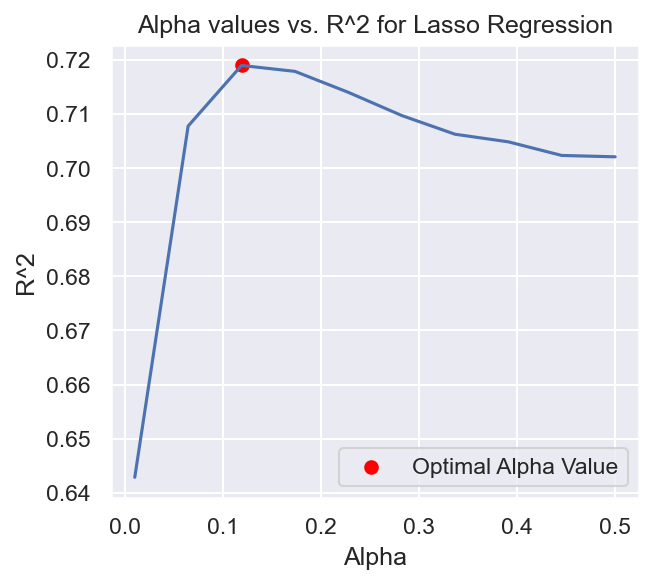

In [40]:
# Plot the cross-validated R^2 versus alpha for Lasso

plt.figure(figsize = (10,4))
plt.subplot(122)
plt.plot(alpha_list_lasso, r2s_lasso)
plt.scatter(alpha_list_lasso[np.argmax(r2s_lasso)], max(r2s_lasso), color='red', label='Optimal Alpha Value')
print("OPTIMAL ALPHA LASSO:", alpha_list_lasso[np.argmax(r2s_lasso)])
plt.ticklabel_format(useOffset=False)
plt.title("Alpha values vs. R^2 for Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [41]:
alpha_list_ridge = np.linspace(0.8, 1, 10)
r2s_ridge = model_cv_r2(Ridge, X, y, alpha_list_ridge, k = 5, random_state = 24)
r2s_ridge

[0.6464985337661651,
 0.6471025589745648,
 0.6476927562177803,
 0.6482697947129913,
 0.6488342920468748,
 0.649386819508767,
 0.6499279067512064,
 0.6504580458764083,
 0.6509776950310268,
 0.6514872815781271]

OPTIMAL ALPHA RIDGE: 1.0


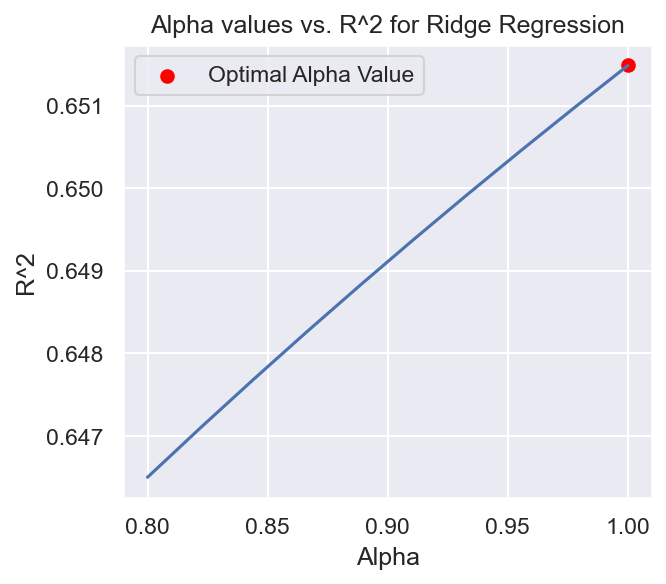

In [42]:
# Plot the cross-validated R^2 versus alpha for Ridge
plt.figure(figsize = (10,4))
plt.subplot(122)
plt.plot(alpha_list_ridge, r2s_ridge)
plt.scatter(alpha_list_ridge[np.argmax(r2s_ridge)], max(r2s_ridge), color='red', label='Optimal Alpha Value')
print("OPTIMAL ALPHA RIDGE:", alpha_list_ridge[np.argmax(r2s_ridge)])
plt.ticklabel_format(useOffset=False)
plt.title("Alpha values vs. R^2 for Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

**1.7.1.e) Lasso and Ridge Models (After finding optimal alpha hyperparameters)**

In [43]:
optimal_alpha_lasso = alpha_list_lasso[np.argmax(r2s_lasso)]
clf = linear_model.Lasso(alpha=optimal_alpha_lasso)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("LASSO TRAINING SCORE:", train_score)
print("LASSO TEST SCORE:", test_score)

LASSO TRAINING SCORE: 0.859898989862675
LASSO TEST SCORE: 0.7487664433706033


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Lasso Regression')

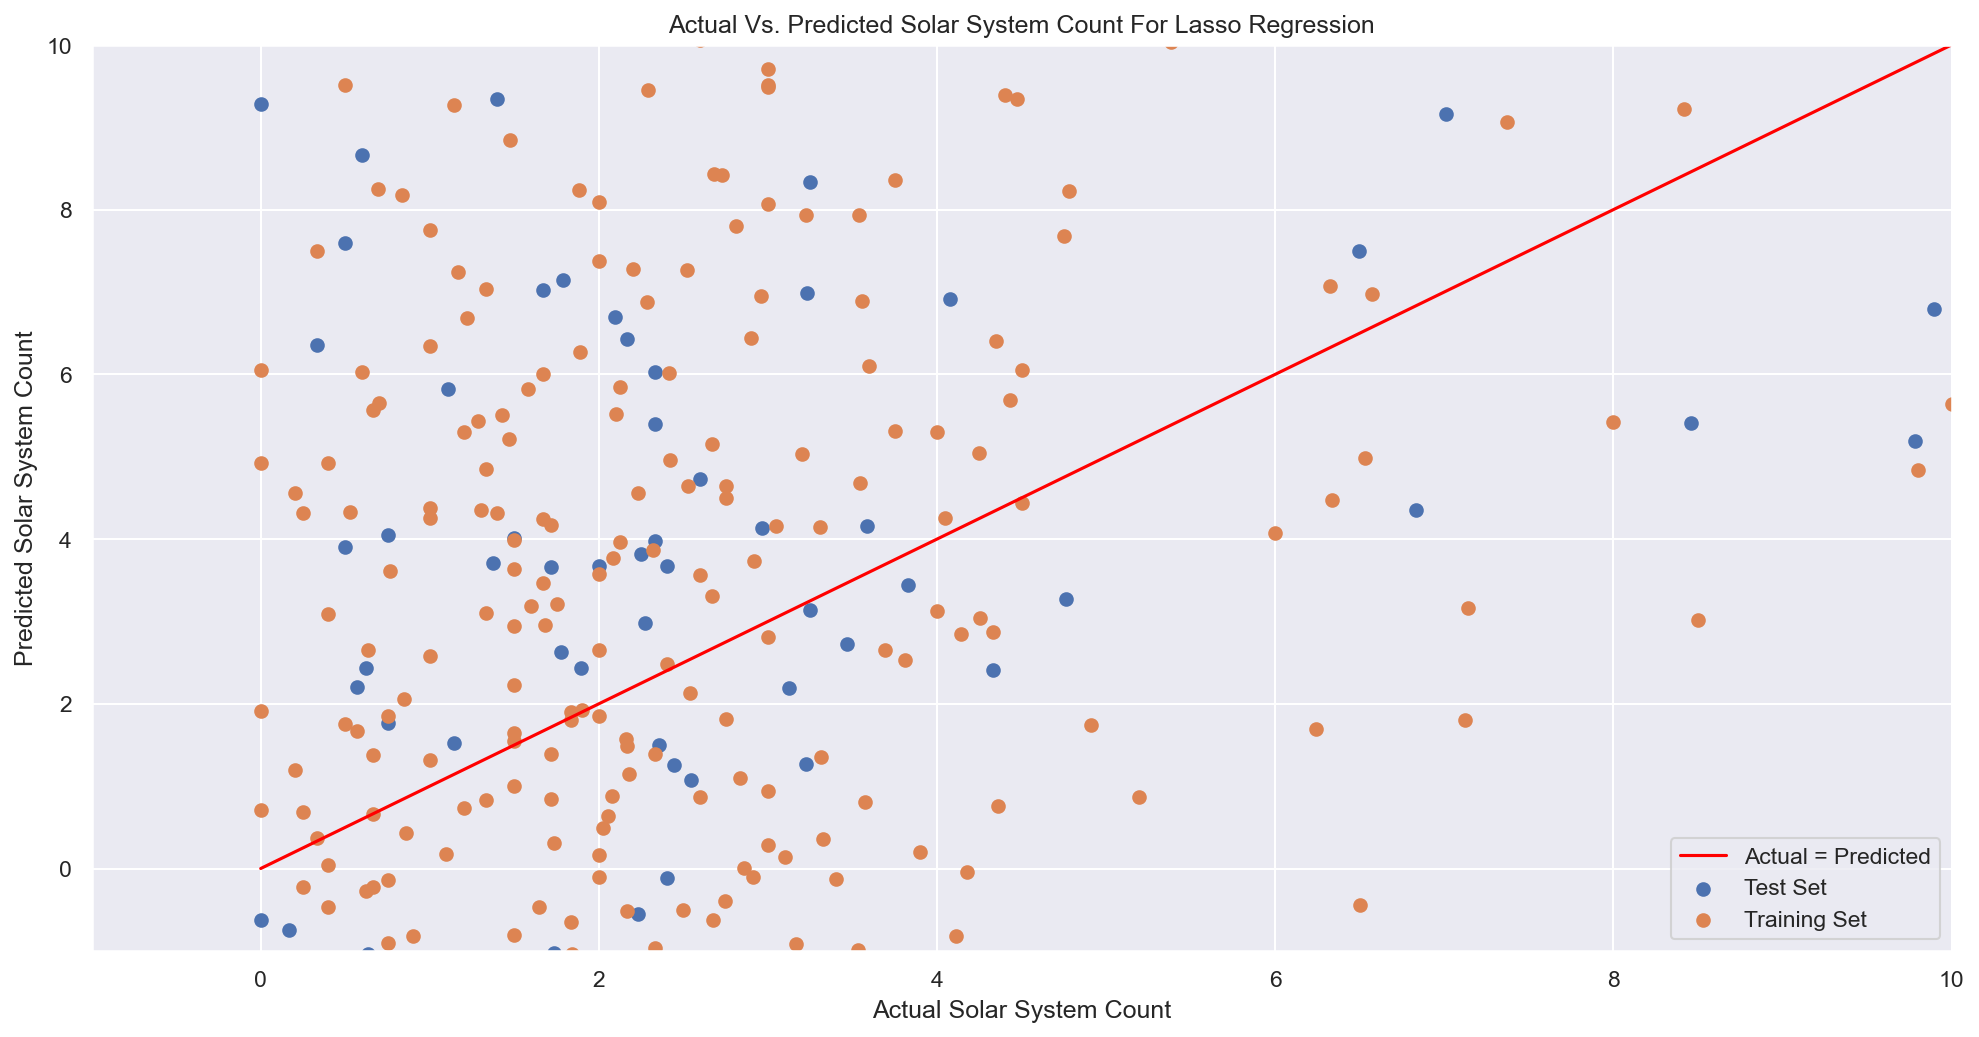

In [44]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Lasso Regression")

In [45]:
optimal_alpha_ridge = alpha_list_ridge[np.argmax(r2s_ridge)]
clf = linear_model.Ridge(alpha=optimal_alpha_ridge)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("RIDGE TRAINING SCORE:", train_score)
print("RIDGE TEST SCORE:", test_score)

RIDGE TRAINING SCORE: 0.888038597045371
RIDGE TEST SCORE: 0.706331762175562


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Ridge Regression')

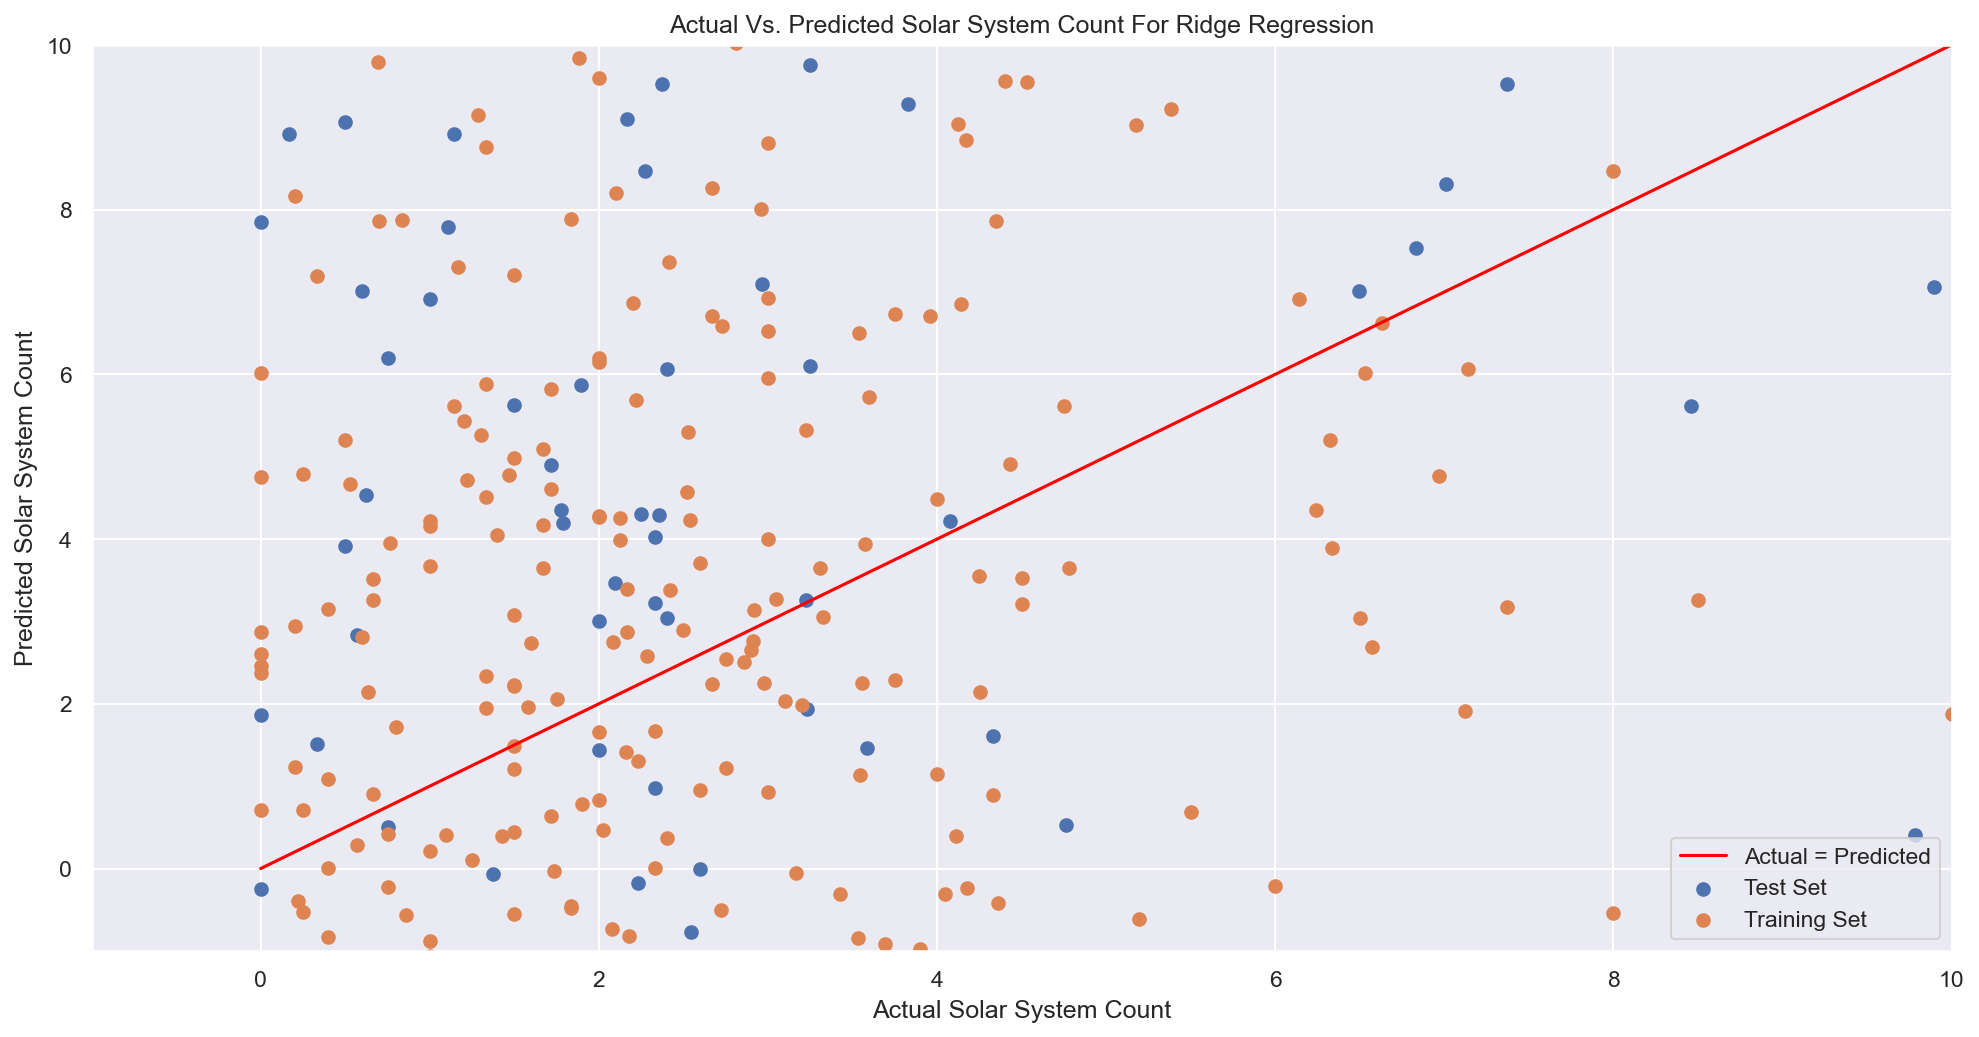

In [46]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Ridge Regression")

### 1.7.2 Prediction Problem #2 (Using DeepSolar, Tracking The Sun, and SacBee)

In [47]:
X = all_datasets.drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
y = all_datasets['solar_system_count']
cols = X.columns.tolist()
sc= StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**1.7.2.a) Lasso Model**

In [48]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("LASSO TRAINING SCORE:", train_score)
print("LASSO TEST SCORE:", test_score)

LASSO TRAINING SCORE: 0.9269442902495608
LASSO TEST SCORE: -0.03304106919919514


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SacBee: Actual Vs. Predicted Solar System Count For Lasso Regression')

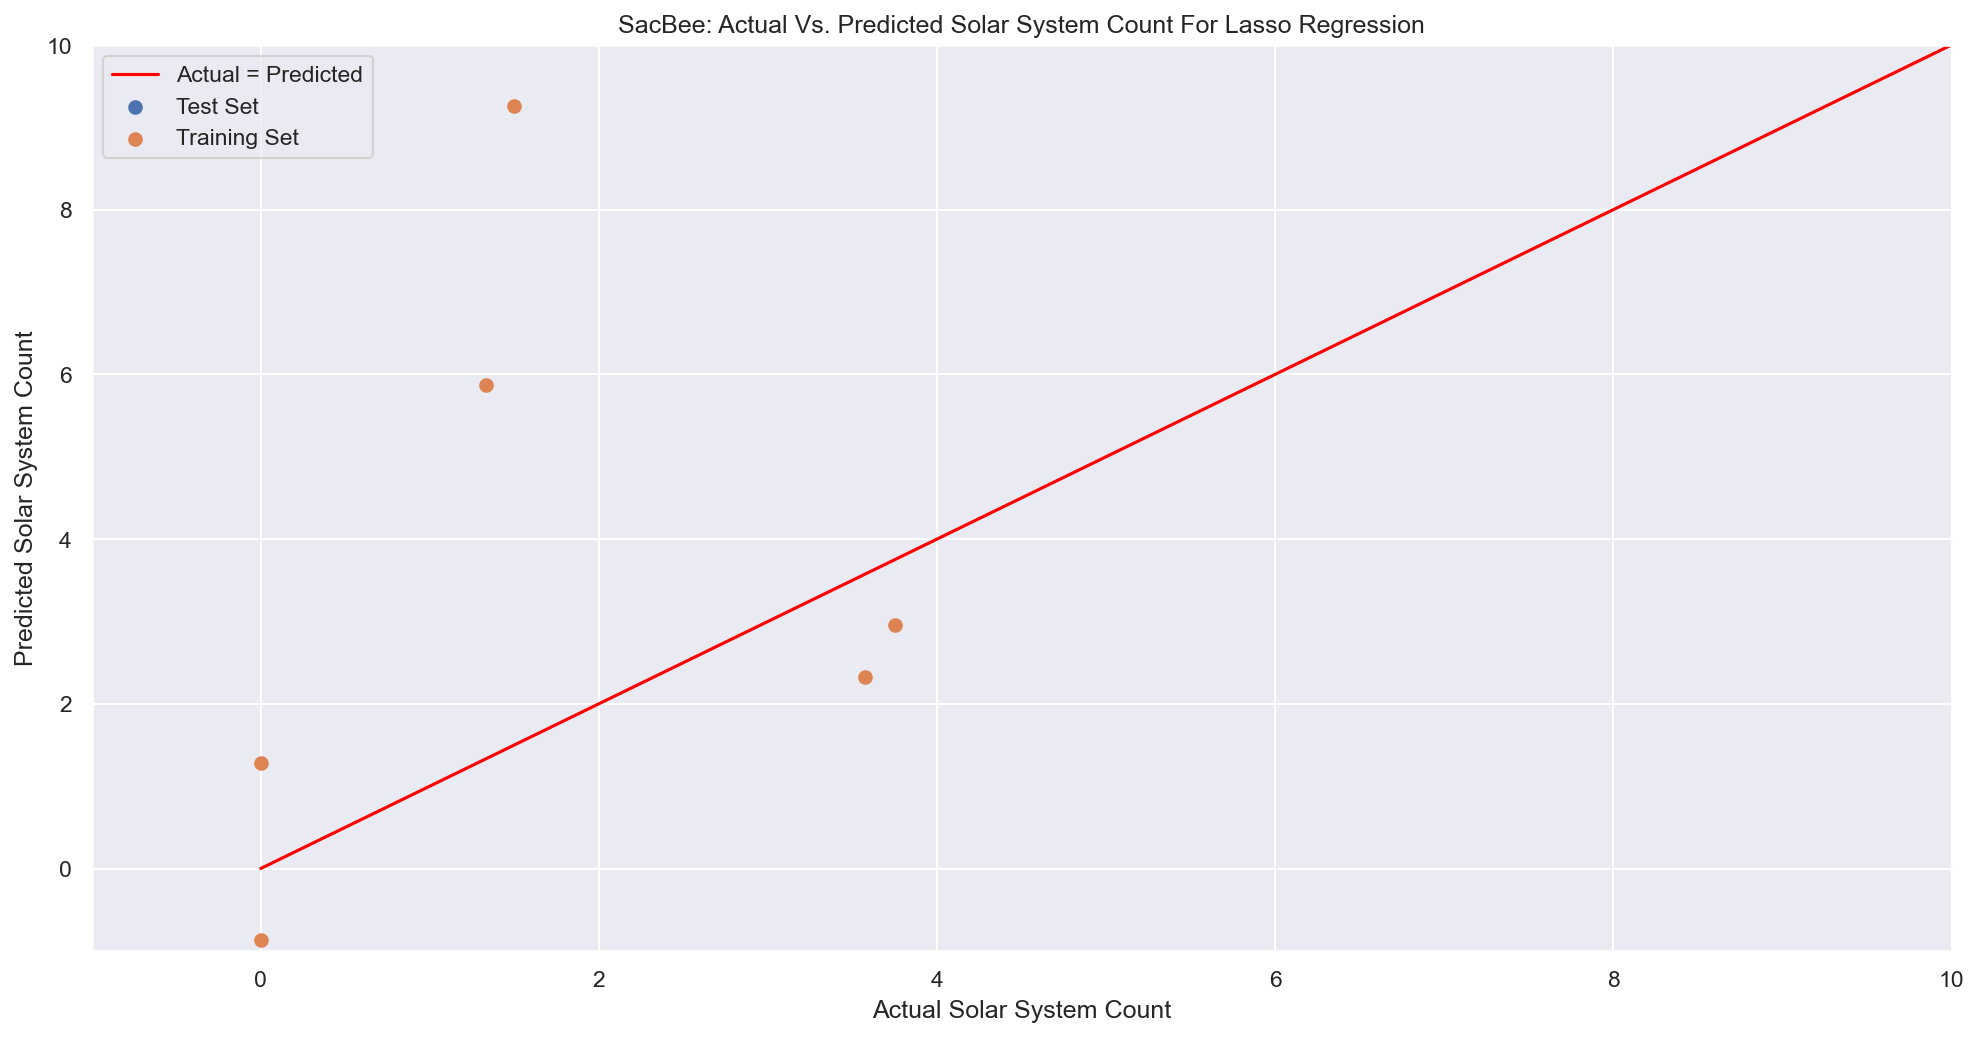

In [49]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("SacBee: Actual Vs. Predicted Solar System Count For Lasso Regression")

**1.7.1.b) Ridge Model**

In [50]:
clf = linear_model.Ridge()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Ridge TRAINING SCORE:", train_score)
print("Ridge TEST SCORE:", test_score)

Ridge TRAINING SCORE: 0.9960554646308474
Ridge TEST SCORE: -0.5560307306625762


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SacBee: Actual Vs. Predicted Solar System Count For Ridge Regression')

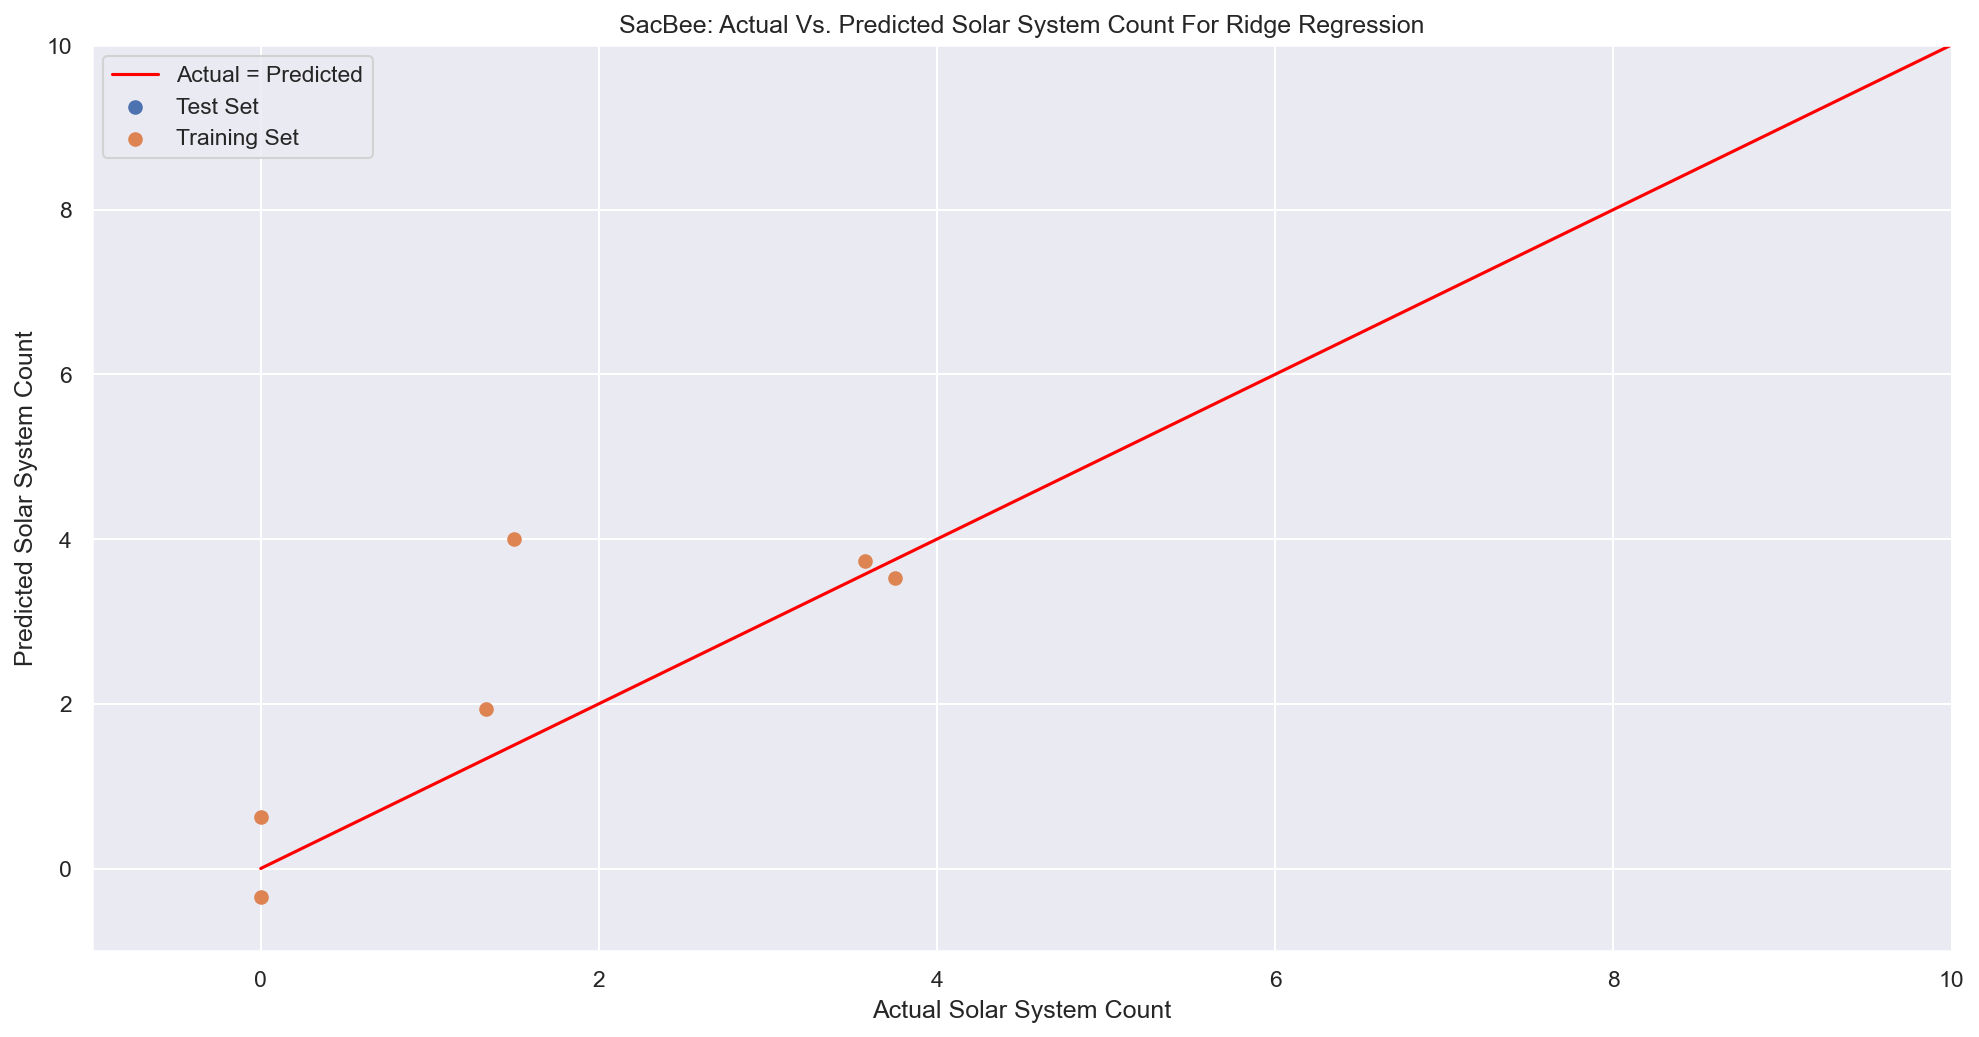

In [51]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("SacBee: Actual Vs. Predicted Solar System Count For Ridge Regression")

**1.7.2.c) Neural Networks**

In [52]:
# Initialize the model
model = Sequential()

# Initialize layers
num_dim = X_train.shape[1]
# model.add(Dense(50, input_dim=num_dim, activation='relu')) 
# model.add(Dense(5, activation='sigmoid'))
# model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

model.add(Dense(4, input_dim=num_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose = 0)

y_pred=model.predict(X_train)

In [53]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("R^2 For Neural Nets Train", r2_score(y_train, y_pred_train))
print("R^2 For Neural Nets Test", r2_score(y_test, y_pred_test))

R^2 For Neural Nets Train 0.7683256462887409
R^2 For Neural Nets Test 0.27916578188265706


**1.7.2.d) Hyperparameter Tuning for Lasso and Ridge Using KFold Cross Validation**

In [54]:
alpha_list_lasso = np.linspace(0.01, 0.5, 10)
r2s_lasso = model_cv_r2(Lasso, X, y, alpha_list_lasso, k = 5, random_state = 24)
r2s_lasso

C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.8617431960887, tolerance: 14.454818936598617
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.45354538195716, tolerance: 14.454818936598617
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.4999753922008, tolerance: 14.454818936598617
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

[-1.949990965919523,
 -1.3689914267665175,
 -1.520898462377301,
 -1.3420332574755183,
 -1.2322758778663574,
 -1.157601292495991,
 -1.0051801499397879,
 -0.8377333961566229,
 -0.734194835016725,
 -0.6337790161540694]

OPTIMAL ALPHA LASSO: 0.5


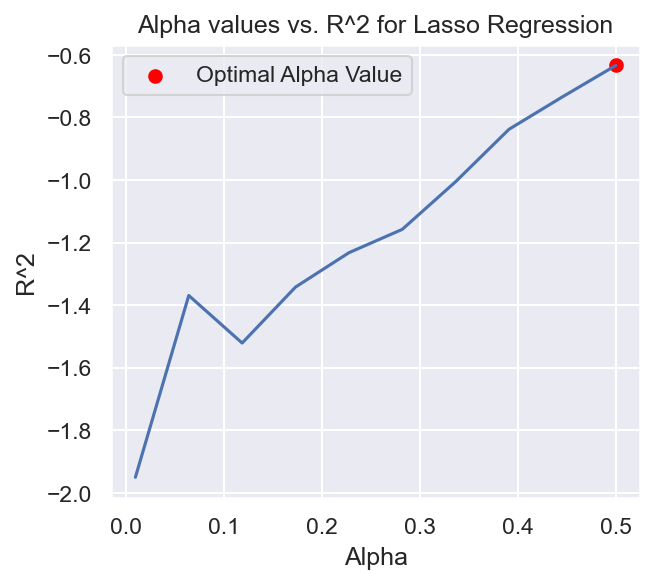

In [55]:
# Plot the cross-validated R^2 versus alpha for Lasso

plt.figure(figsize = (10,4))
plt.subplot(122)
plt.plot(alpha_list_lasso, r2s_lasso)
plt.scatter(alpha_list_lasso[np.argmax(r2s_lasso)], max(r2s_lasso), color='red', label='Optimal Alpha Value')
print("OPTIMAL ALPHA LASSO:", alpha_list_lasso[np.argmax(r2s_lasso)])
plt.ticklabel_format(useOffset=False)
plt.title("Alpha values vs. R^2 for Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [56]:
alpha_list_ridge = np.linspace(0.8, 1, 10)
r2s_ridge = model_cv_r2(Ridge, X, y, alpha_list_ridge, k = 5, random_state = 24)
r2s_ridge

[-0.4351462935878557,
 -0.42798587075494854,
 -0.42091979715670896,
 -0.4139461555139425,
 -0.40706308298619776,
 -0.4002687691541237,
 -0.39356145409434584,
 -0.3869394265421154,
 -0.3804010221366426,
 -0.373944621744873]

OPTIMAL ALPHA RIDGE: 1.0


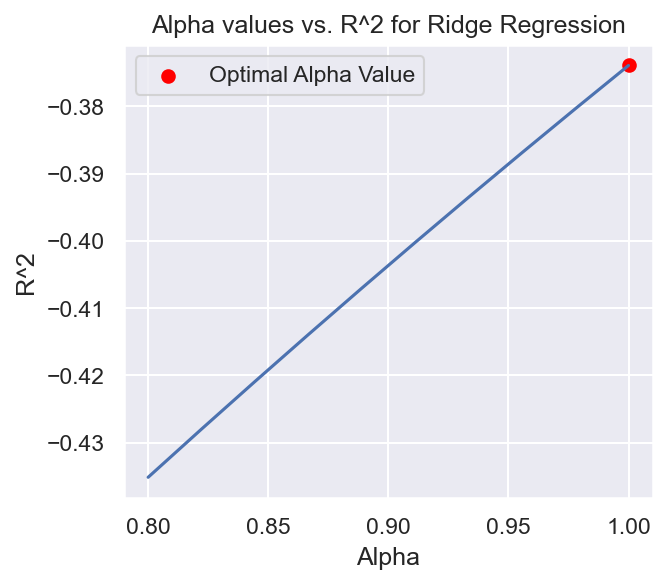

In [57]:
# Plot the cross-validated R^2 versus alpha for Ridge
plt.figure(figsize = (10,4))
plt.subplot(122)
plt.plot(alpha_list_ridge, r2s_ridge)
plt.scatter(alpha_list_ridge[np.argmax(r2s_ridge)], max(r2s_ridge), color='red', label='Optimal Alpha Value')
print("OPTIMAL ALPHA RIDGE:", alpha_list_ridge[np.argmax(r2s_ridge)])
plt.ticklabel_format(useOffset=False)
plt.title("Alpha values vs. R^2 for Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

**1.7.2.e) Lasso and Ridge Models (After finding optimal alpha hyperparameters)**

In [58]:
optimal_alpha_lasso = alpha_list_lasso[np.argmax(r2s_lasso)]
clf = linear_model.Lasso(alpha=optimal_alpha_lasso)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("LASSO TRAINING SCORE:", train_score)
print("LASSO TEST SCORE:", test_score)

LASSO TRAINING SCORE: 0.9741230794352463
LASSO TEST SCORE: -0.36426475627667787


C:\Users\Brendan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.081260482435937, tolerance: 12.730372365104595
  model = cd_fast.enet_coordinate_descent(


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Lasso Regression')

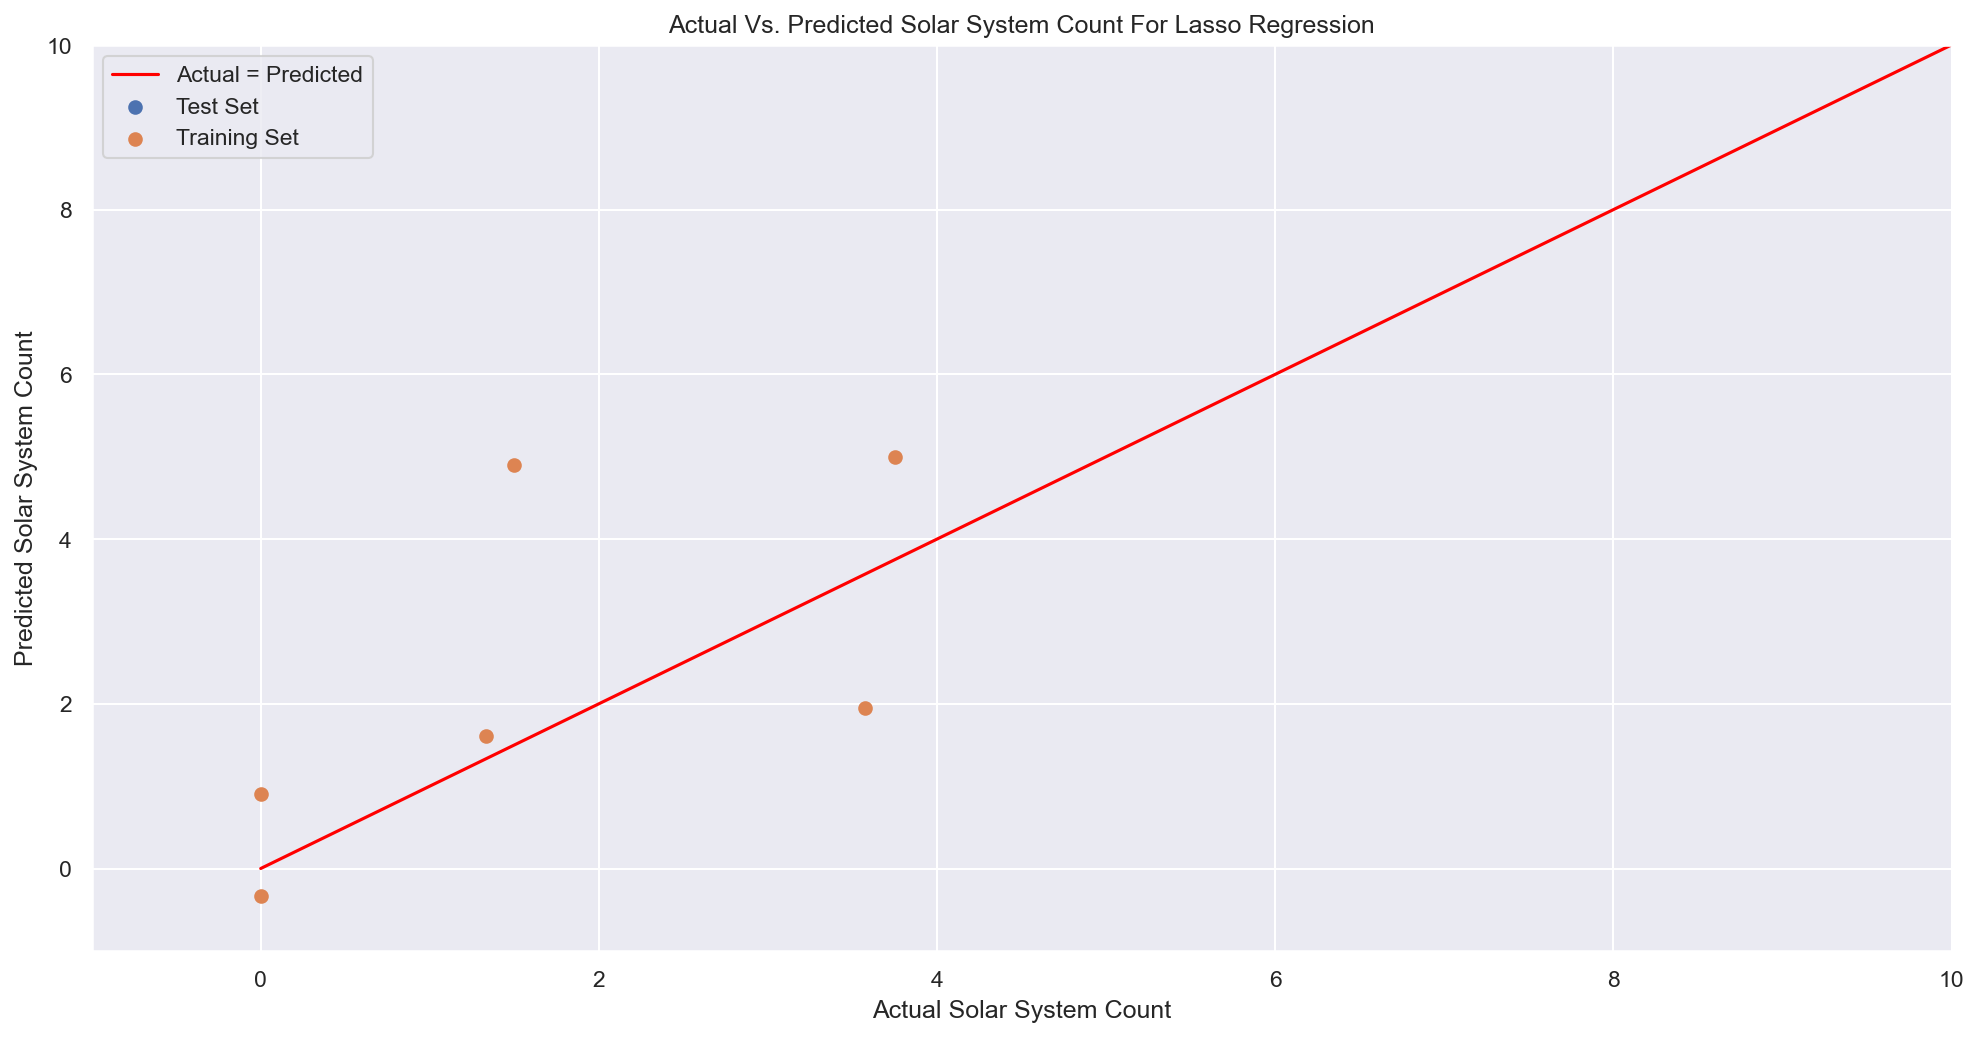

In [59]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Lasso Regression")

In [60]:
optimal_alpha_ridge = alpha_list_ridge[np.argmax(r2s_ridge)]
clf = linear_model.Ridge(alpha=optimal_alpha_ridge)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("RIDGE TRAINING SCORE:", train_score)
print("RIDGE TEST SCORE:", test_score)

RIDGE TRAINING SCORE: 0.9960554646308474
RIDGE TEST SCORE: -0.5560307306625762


C:\Users\Brendan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs. Predicted Solar System Count For Ridge Regression')

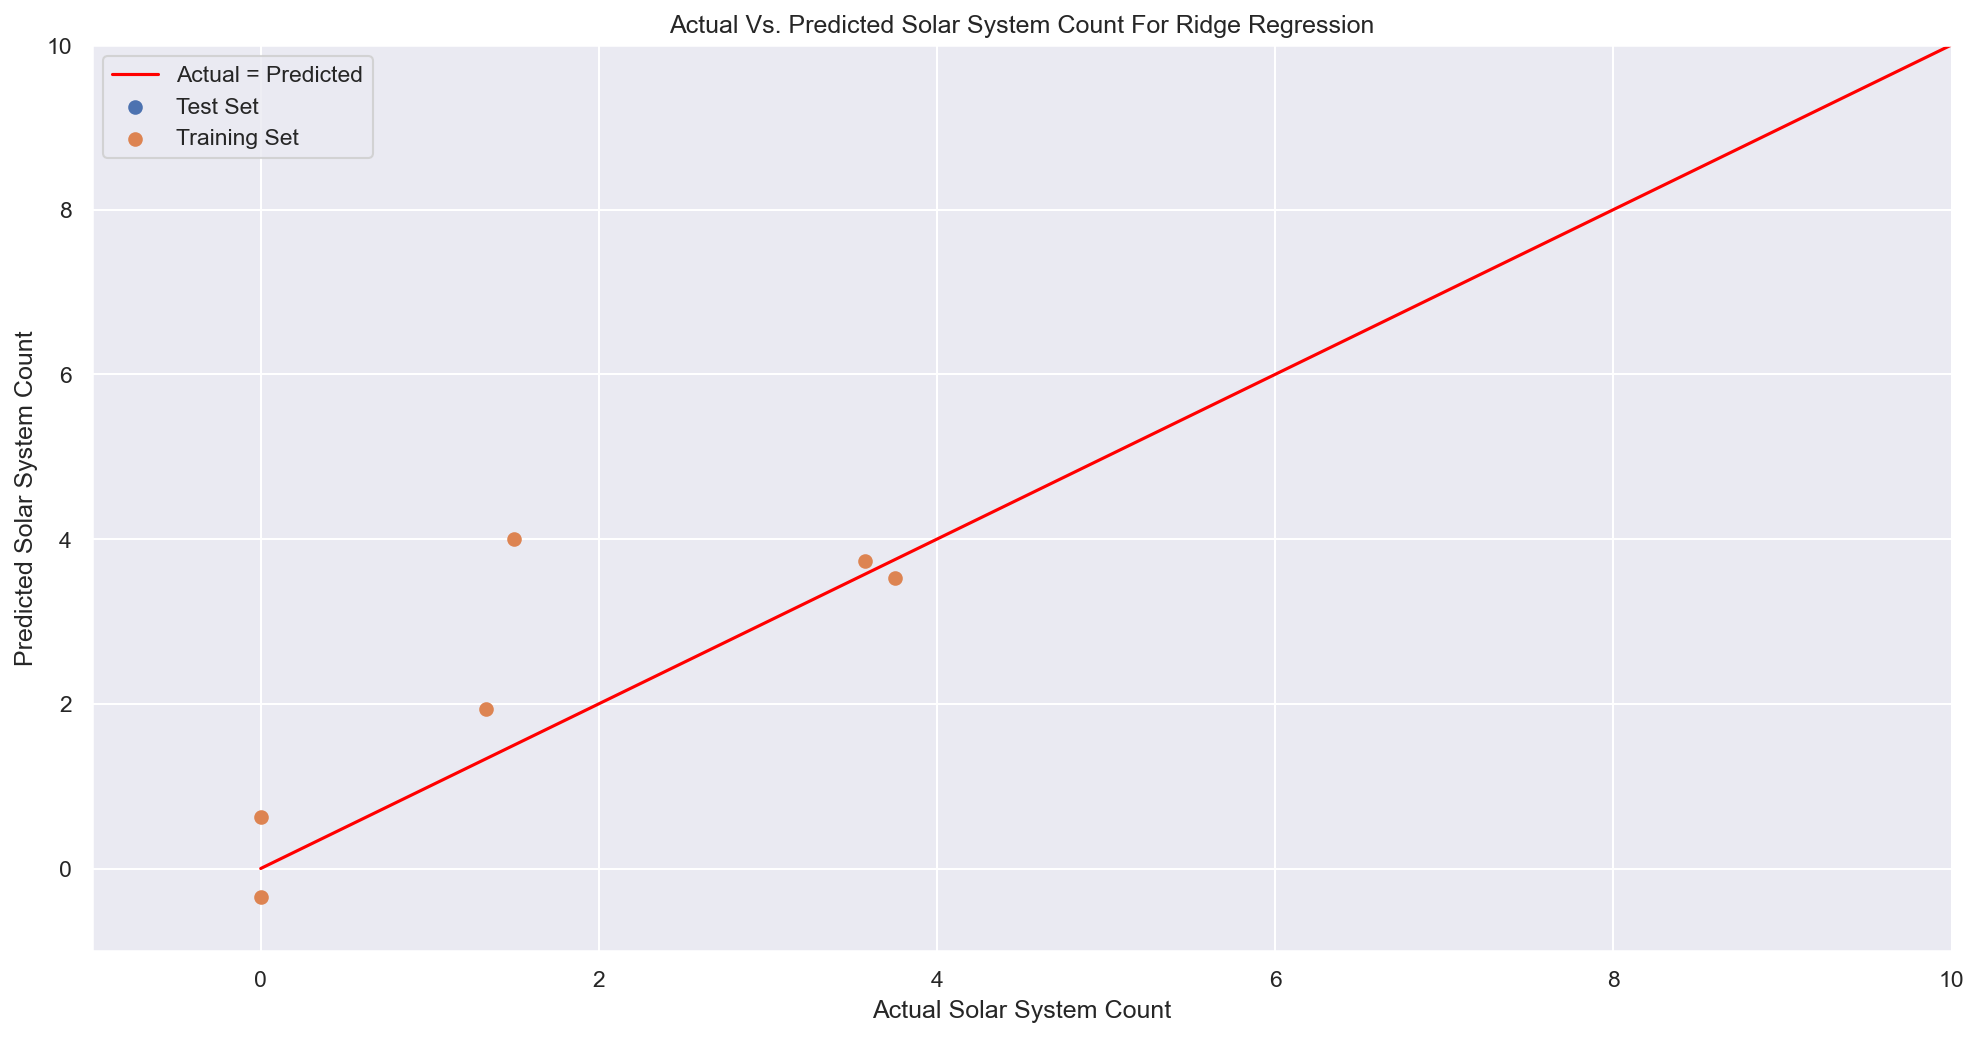

In [61]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
plt.scatter(y_test, y_pred_test, label="Test Set")
plt.scatter(y_train, y_pred_train, label="Training Set")
sns.lineplot(y_train, y_train, color='red', label='Actual = Predicted')
plt.xlabel("Actual Solar System Count")
plt.ylabel("Predicted Solar System Count")
plt.legend()
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.title("Actual Vs. Predicted Solar System Count For Ridge Regression")

### 1.7.3 Predicting the Number of Solar Panels for Unseen County Data In Alabama

In order to form predictions for unseen data, the first step was removing Alabama counties from the dataset. In our datatset, there were only two counties '01073' and '01097’, which were both removed. We then extracted the features for these unseen counties and fed them into our three prediction models: Lasso, Ridge, and Neural Networks. 

In [62]:
unseen_data = all_united_states.loc[['01073', '01097'], :].drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
seen_data = all_united_states.drop(['01073', '01097'])

X = seen_data.drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
y = seen_data['solar_system_count']
cols = X.columns.tolist()
sc= StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# used KFold cross validation in previous section to find optimal learning rate
optimal_alpha_lasso = alpha_list_lasso[np.argmax(r2s_lasso)]
clf = linear_model.Lasso(alpha=optimal_alpha_lasso)
clf.fit(X_train, y_train)

sc= StandardScaler()
unseen_scaled = sc.fit_transform(unseen_data)
print("Lasso Prediction for Unseen Data:", clf.predict(unseen_scaled))

# used KFold cross validation in previous section to find optimal learning rate
optimal_alpha_ridge = alpha_list_ridge[np.argmax(r2s_ridge)]
clf = linear_model.Ridge(alpha=optimal_alpha_ridge)
clf.fit(X_train, y_train)
print("Ridge Prediction for Unseen Data:", clf.predict(unseen_scaled))

# Initialize the model
model = Sequential()

# Initialize layers
num_dim = X_train.shape[1]

model.add(Dense(4, input_dim=num_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose = 0)

print("Neural Networks Prediction for Unseen Data:", model.predict(unseen_scaled))

Lasso Prediction for Unseen Data: [24.05292253  1.01279294]
Ridge Prediction for Unseen Data: [-1.26435191 28.76563273]
Neural Networks Prediction for Unseen Data: [[9.6464   ]
 [1.1295756]]


**Interpretation of Results for Unseen Data:** Since neural networks got the highest test accuracy out of the two models for the seen data, we feel the most confident in our neural network prediction for the number of solar panels for the unseen counties. For the Neural Networks we got a prediction of 15.07 and 3.5 for the two counties in Alabama (county codes: '01073', '01097), respectively. In terms of the resource allocation problem of rebates and grants, governments should be wary of extending the model to places where data regarding solar panels does not exist since they risk lower accuracy in the model.

## 1.8 Interpretation and Conclusions (20 points)

We also wanted to make visualizations in the form of a heatmap and Choropleth to capture the density of solar panels in various U.S counties. To do these, we relied upon the Folium Python package. We used .JSON files of U.S states and counties to identify the locations on a latitude and longitude based map. We then inserted the predicted values for the solar panels for each of these counties. 

### 1.8.1 Folium Heat Map For Visualizing Predicted Solar Panel Density Across U.S.A.

In [63]:
file = "deepsolar_tract.csv"
temp_deep_solar = pd.read_csv(file, encoding='cp1252')

# Data cleaning for temp_deep_solar 
temp_deep_solar.drop(['Unnamed: 0'], axis=1, inplace=True)
temp_deep_solar = temp_deep_solar.dropna()

In [64]:
# adds a 0 in front the fips codes for the ones whose first number is less than 10
# first two numbers of the fips codes is the state and 0 must be added to not confuse the states
# for reference: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696 

updated_fips = []
for i in temp_deep_solar["fips"]:
    i = str(i)
    if len(i) == 10: # fips with a length of 10 do not accurately provide information on the state (first two numbers of fips)
        i = i.zfill(len(i)+1) # add a zero to the front of the fips code
    updated_fips.append(i)
    
temp_deep_solar["Updated FIPS (str)"] = updated_fips # adds a column with the updated fips codes

# adds a column called "STCOUNTY fips" to deep_solar. The column is the first five numbers of the fips codes

STCOUNTY_fips_list = []
for i in temp_deep_solar["Updated FIPS (str)"]:
    STCOUNTY_fips_list.append(i[:5])
temp_deep_solar["STCOUNTY fips"] = STCOUNTY_fips_list

In [65]:
# builds a dictionary where the key is the state county FIPS and the value is a list of the lat and lon cords corresponding to the FIPS
merged_datasets = deep_solar.merge(tracking_the_sun, on = "STCOUNTY fips")

fips_lat_lon = {}
for i in merged_datasets.index.to_list():
    if i in temp_deep_solar["STCOUNTY fips"].unique():
        lat = temp_deep_solar[temp_deep_solar["STCOUNTY fips"] == i]['lat'].mean()
        lon = temp_deep_solar[temp_deep_solar["STCOUNTY fips"] == i]['lon'].mean()
        fips_lat_lon[i] = [lat, lon]
    else:
        fips_lat_lon[i] = [None, None]
        
# builds a datframe with the index as state county FIPS and columns lat and lon
fips_lat_lon_df = pd.DataFrame(index = fips_lat_lon.keys(), data = fips_lat_lon.values(), columns = ['lat', 'lon']).rename_axis('STCOUNTY fips')

# add latitude and longitude coordinates to the merged dataset
merged_datasets = merged_datasets.merge(fips_lat_lon_df, on = "STCOUNTY fips").rename(columns={"lat_y": "lat", "lon_y": "lon"})

In [66]:
X = all_united_states.drop(['tile_count', 'solar_system_count', 'total_panel_area', 'number_of_solar_system_per_household', 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'solar_panel_area_per_capita', 'tile_count_residential', 'tile_count_nonresidential', 'solar_system_count_residential', 'solar_system_count_nonresidential', 'total_panel_area_residential', 'total_panel_area_nonresidential', 'heating_fuel_solar'], axis=1)
y = all_united_states['solar_system_count']
cols = X.columns.tolist()
sc= StandardScaler()
X = sc.fit_transform(X)

In [67]:
optimal_alpha_lasso = alpha_list_lasso[np.argmax(r2s_lasso)]
clf = linear_model.Lasso(alpha=optimal_alpha_lasso)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("LASSO TRAINING SCORE:", train_score)
print("LASSO TEST SCORE:", test_score)

LASSO TRAINING SCORE: 0.7784238429668957
LASSO TEST SCORE: 0.7482563613089517


In [68]:
all_united_states['pred_solar_system_count'] = clf.predict(X)

In [69]:
# implementation with for loop

#Create the Map
m = folium.Map(location=[37.871853, -122.258423], zoom_start=14.5)

#Make the list of Latitude/Longitude/Num_Solar_Panels_Predicted
lat = all_united_states['lat'].tolist()
lng = all_united_states['lon'].tolist()
pred = all_united_states['pred_solar_system_count'].tolist()
actual = all_united_states['solar_system_count'].tolist()
locations = list(zip(lat, lng))
HeatMap(data=list(zip(lat, lng))).add_to(m)
folium.LayerControl().add_to(m)

m

### 1.8.2 Choropleth Map For Visualizing Predicted Solar Panel Density Across U.S.A.

In [70]:
#state_unemp = pd.read_csv("state_unemployment.csv")
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'        #for state level data

In [71]:
county_geo = f'https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_050_00_20m.json'

In [72]:
test = all_united_states.reset_index()
test['STCOUNTY fips'] = test['STCOUNTY fips'].astype(int)

In [73]:
def bring_to_zero(x):
    if x < 0:
        return 0
    else:
        return x

file = "ZIP-COUNTY-FIPS_2018-03.csv"
zip_county_fips = pd.read_csv(file)
merged_df = all_united_states.reset_index()
merged_df['STCOUNTY fips'] = merged_df['STCOUNTY fips'].astype(int)
merged_df = merged_df.merge(zip_county_fips, left_on = 'STCOUNTY fips', right_on="STCOUNTYFP")
merged_df = merged_df[['STATE', 'pred_solar_system_count']]
merged_df = merged_df.groupby('STATE').sum().reset_index()
#merged_df = merged_df.loc[merged_df['STATE'] != 'CA', :] 
merged_df['pred_solar_system_count'] = merged_df['pred_solar_system_count'].apply(bring_to_zero)

In [74]:
us = all_united_states.reset_index()
us['STCOUNTY fips'] = us['STCOUNTY fips'].astype(int)
us = us.merge(zip_county_fips, left_on = 'STCOUNTY fips', right_on="STCOUNTYFP")
us['county'] = test['STCOUNTY fips'].apply(lambda x: str(x)[-3:])

In [75]:
city = us.groupby("CITY").sum()
city = city.reset_index()[['CITY', 'pred_solar_system_count']]
city = city.loc[city['pred_solar_system_count'] <= 100]
city['pred_solar_system_count'] = city['pred_solar_system_count'].apply(bring_to_zero)

In [76]:
usa_state = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data = state_geo,                  #json
    name ='choropleth',                  
    data = merged_df,                     
    columns = ['STATE', 'pred_solar_system_count'], #columns to work on
    key_on ="feature.id",
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.2,
   legend_name = "Predicted Number Of Solar Panels",
    threshold_scale=[0, 1000, 50000, 100000, 250000]
).add_to(usa_state)
usa_state

In [77]:
county = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data = county_geo,                  #json
    name ='choropleth',                  
    data = city,                     
    columns = ['CITY', 'pred_solar_system_count'], #columns to work on
    key_on = 'properties.NAME',
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.2,
   legend_name = "Predicted Number Of Solar Panels",
    threshold_scale=[0, 20, 40, 60, 80, 100]
).add_to(county)
county

**Important note:** For the sake of having the color scheme be an appropriate range, we removed data for certain counties from California, which include a vast majority from the Bay Area and Los Angeles. This removal allowed us to have a better range for the colors of the Choropleth map.

### 1.8.3 Map Interpretations

After visualizing the results with a heatmap, we can see we are missing a lot of data from the area of the U.S around Montana and Wyoming. California among the states with the most solar panels. For the Choropleth map, we can see that the West Coast of the U.S tends to have higher densities of solar panels among the counties. 

### 1.8.4 Conclusion and Final Thoughts

**1.8.4a) Question 1:**

An important resource allocation problem that our model helps solve is how to allocate rebates and grants related to solar. As we’ve explained in previous sections, Biden released a Clean Electricity Performance Program, which will invest 150 billion dollars into reducing emissions, creating new jobs, and growing the economy. An aspect of this program is rebates and grants, which are ways of enticing consumers and businesses into getting interested in solar. 
 
Our advice to the government is to use our model to give them a sense of which areas don’t have much solar panels (i.e areas to target with rebates and grants) and which areas have significant amounts of solar panels (i.e areas to probably not target too much with rebates and grants). This would allow the government to more efficiently allocate their rebates and grants because there are communities that have high solar potential (i.e if they had solar, they could potentially save a significant amount in energy) but there isn’t a lot of knowledge about solar panels. Since not a lot of people have the background in solar in such a community, they end up not investing in solar. By targeting this region with rebates and grants, not only would the government be increasing the knowledge of solar panels in the area, but they could potentially increase the number of installed solar panels, as well. The issue is, however, the government needs a way to identify such communities. Our model provides a systematic way of identifying such communities with respect to features such as average household income and poverty level. Thus, readers should care about our results because it has many implications for how rebates and grants are allocated. 
 
A second resource allocation problem that our model solves is how solar companies allocate their advertisement campaigns. Depending on how likely a region is to support solar panel installation, a solar panel company may or may not want to target them for a campaign. Thus, our model provides a way for solar panel companies to get a gauge of how popular solar is in a county because counties with higher solar panel counts will probably react positively to solar panel advertisements. Our recommendation to solar panel companies is to direct attention to areas where there are high densities of solar panels (i.e Los Angeles, California) so that they can maximize their profit in an area where solar is popular. On the flip side, they can also target regions that do not have many solar panels to sway areas to get solar panels. There could be more programs to promote education of how these rebates work and why installing solar panels will be beneficial not just to the household in terms of their electric bill, but also to helping the environment. This can help produce cleaner energy in these regions and help with our global goal of reaching zero carbon emissions in 2050. All in all, readers should care about these results because our model is much more simpler than Stanford’s DeepSolar algorithm and can be interpreted easily using our choropleth map. 

**1.8.4b) Question 2:**

Since we changed the granularity from fips to county, there may have been some important data lost because of the granularity change. We used a regression line for LASSO and RIDGE to fit our results when in reality, the graph shows that the relationship between many combinations of these features and true solar system count may be different. As aligned with our results, the neural net performed the best out of our models, since it can model nonlinearly unlike LASSO and RIDGE. If we had further time, we would tune the parameters of the neural net to see if it can produce even better results as it looks like our model is slightly overfitting to the current data. 
 
One reason that our model may be flawed is because we are assuming we have data on all counties. In the Choropleth graph, we realized that many counties lack data that we would need to predict solar panels. Based on the graph, it is mostly counties that are rural and may not have access to technology like other counties. Since these counties may not have the technology, it is hard to get the feature data needed to produce an accurate model. Since our model uses 173 columns, it means that there are a lot of features we use and need to collect from these communities if we want a full picture of the amount of solar panels in the United States.
 
In terms of prediction problems, the tendency for poor communities to lack access to technology skews our data in a certain direction. For example, some communities may have low education or low rebates because they are not as widely known. These regions were relatively unknown to us in terms of the features data and our prediction data. 
 
This puts our model in a position that overestimates how many solar panels a county has. Since a county may not have access to technology, it is unlikely that these communities will have access to solar panels. Therefore, it is likely that our model will overestimate how many solar panels a region has. Most of the data is on counties that may have more access to technology and therefore will be more likely to have solar panels. 
 
Another important factor that our results may be flawed is that we use deepsolar’s neural net predictions on solar panels. Since deepsolar will likely have their own errors, we are training on possibly their errors. We decided to use deepsolar because of the amount of features they have to offer as well as include some of our own features (tracking the sun and sacbee) to determine if we can produce more accurate predictions. Furthermore, we also could not find which values are the true solar count and which are predicted by deepsolar. They were all merged together which means we do not know the true error of our model. 
